# Importing necessary libraries and packages

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import math
import os
print('Libraries Imported')

Libraries Imported


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Loading in datasets

In [ ]:
teams = pd.read_csv('nba standing 2004-2021.csv')
teams

Rk                   Team Overall   Home   Road  E Wins  E Loss  W Wins  \
0     1           Phoenix Suns   64-18   32-9   32-9      25       5      39   
1     2      Memphis Grizzlies   56-26  30-11  26-15      20      10      36   
2     3  Golden State Warriors   53-29  31-10  22-19      20      10      33   
3     4             Miami Heat   53-29  29-12  24-17      35      17      18   
4     5       Dallas Mavericks   52-30  29-12  23-18      16      14      36   
..   ..                    ...     ...    ...    ...     ...     ...     ...   
534  25          Atlanta Hawks   28-54  18-23  10-31      19      35       9   
535  26   Los Angeles Clippers   28-54  18-23  10-31      14      16      14   
536  27     Washington Wizards   25-57  17-24   8-33      16      38       9   
537  28          Chicago Bulls   23-59  14-27   9-32      19      35       4   
538  29          Orlando Magic   21-61  11-30  10-31      17      37       4   

     W Loss Conference  ...  Unnamed: 18  Unnamed: 19  Unnamed: 20  \
0        13       West  ...          NaN          NaN          NaN   
1        16       West  ...          NaN          NaN          NaN   
2        19       West  ...          NaN          NaN          NaN   
3        12       East  ...          NaN          NaN          NaN   
4        16       West  ...          NaN          NaN          NaN   
..      ...        ...  ...          ...          ...          ...   
534      19       East  ...          NaN          NaN          NaN   
535      38       West  ...          NaN          NaN          NaN   
536      19       East  ...          NaN          NaN          NaN   
537      24       East  ...          NaN          NaN          NaN   
538      24       East  ...          NaN          NaN          NaN   

     Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  \
0            NaN          NaN          NaN          NaN          NaN   
1            NaN          NaN          NaN          NaN          NaN   
2            NaN          NaN          NaN          NaN          NaN   
3            NaN          NaN          NaN          NaN          NaN   
4            NaN          NaN          NaN          NaN          NaN   
..           ...          ...          ...          ...          ...   
534          NaN          NaN          NaN          NaN          NaN   
535          NaN          NaN          NaN          NaN          NaN   
536          NaN          NaN          NaN          NaN          NaN   
537          NaN          NaN          NaN          NaN          NaN   
538          NaN          NaN          NaN          NaN          NaN   

     Unnamed: 26  Unnamed: 27  
0            NaN          NaN  
1            NaN          NaN  
2            NaN          NaN  
3            NaN          NaN  
4            NaN          NaN  
..           ...          ...  
534          NaN          NaN  
535          NaN          NaN  
536          NaN          NaN  
537          NaN          NaN  
538          NaN          NaN  

[539 rows x 28 columns]

In [ ]:
dpoy = pd.read_csv('dpoy.csv', header=0)
dpoy

Unnamed: 0        Unnamed: 1 Unnamed: 2 Unnamed: 3 Voting Unnamed: 5  \
0         Rank            Player        Age         Tm  First    Pts Won   
1            1      Marcus Smart         27        BOS     37        257   
2            2     Mikal Bridges         25        PHO     22        202   
3            3       Rudy Gobert         29        UTA     12        136   
4            4       Bam Adebayo         24        MIA     13        128   
..         ...               ...        ...        ...    ...        ...   
371         8T  Shaquille O'Neal         28        LAL      2          2   
372        11T       Kobe Bryant         22        LAL      1          1   
373        11T     Allen Iverson         25        PHI      1          1   
374        11T        Jason Kidd         27        PHO      1          1   
375        11T      Shawn Marion         22        PHO      1          1   

    Unnamed: 6 Unnamed: 7 Unnamed: 8 Per Game  ... Unnamed: 11 Unnamed: 12  \
0      Pts Max      Share          G       MP  ...         TRB         AST   
1          500      0.514         71     32.3  ...         3.8         5.9   
2          500      0.404         82     34.8  ...         4.2         2.3   
3          500      0.272         66     32.1  ...        14.7         1.1   
4          500      0.256         56     32.6  ...        10.1         3.4   
..         ...        ...        ...      ...  ...         ...         ...   
371        123      0.016         74     39.5  ...        12.7         3.7   
372        123      0.008         68     40.9  ...         5.9           5   
373        123      0.008         71       42  ...         3.8         4.6   
374        123      0.008         77     39.8  ...         6.4         9.8   
375        123      0.008         79     36.2  ...        10.7           2   

    Unnamed: 13 Unnamed: 14 Shooting Unnamed: 16 Unnamed: 17 Advanced  \
0           STL         BLK      FG%         3P%         FT%       WS   
1           1.7         0.3    0.418       0.331       0.793      5.6   
2           1.2         0.4    0.534       0.369       0.834      8.9   
3           0.7         2.1    0.713           0        0.69     11.7   
4           1.4         0.8    0.557           0       0.753      7.2   
..          ...         ...      ...         ...         ...      ...   
371         0.6         2.8    0.572           0       0.513     14.9   
372         1.7         0.6    0.464       0.305       0.853     11.3   
373         2.5         0.3     0.42        0.32       0.814     11.8   
374         2.2         0.3    0.411       0.297       0.814      9.6   
375         1.7         1.4     0.48       0.256        0.81     11.7   

    Unnamed: 19 Unnamed: 20  
0         WS/48        Year  
1         0.116        2021  
2          0.15        2021  
3         0.264        2021  
4         0.188        2021  
..          ...         ...  
371       0.245        2000  
372       0.196        2000  
373        0.19        2000  
374        0.15        2000  
375       0.196        2000  

[376 rows x 21 columns]

In [ ]:
dpoy.columns = dpoy.iloc[0].tolist()
dpoy = dpoy.iloc[1: , :]
dpoy['Player'] = dpoy['Player'].str.replace('*', '')
dpoy

<ipython-input-68-6f1a731fe5a2>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dpoy['Player'] = dpoy['Player'].str.replace('*', '')
<ipython-input-68-6f1a731fe5a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpoy['Player'] = dpoy['Player'].str.replace('*', '')


Rank             Player Age   Tm First Pts Won Pts Max  Share   G    MP  \
1      1       Marcus Smart  27  BOS    37     257     500  0.514  71  32.3   
2      2      Mikal Bridges  25  PHO    22     202     500  0.404  82  34.8   
3      3        Rudy Gobert  29  UTA    12     136     500  0.272  66  32.1   
4      4        Bam Adebayo  24  MIA    13     128     500  0.256  56  32.6   
5      5  Jaren Jackson Jr.  22  MEM    10      99     500  0.198  78  27.3   
..   ...                ...  ..  ...   ...     ...     ...    ...  ..   ...   
371   8T   Shaquille O'Neal  28  LAL     2       2     123  0.016  74  39.5   
372  11T        Kobe Bryant  22  LAL     1       1     123  0.008  68  40.9   
373  11T      Allen Iverson  25  PHI     1       1     123  0.008  71    42   
374  11T         Jason Kidd  27  PHO     1       1     123  0.008  77  39.8   
375  11T       Shawn Marion  22  PHO     1       1     123  0.008  79  36.2   

     ...   TRB  AST  STL  BLK    FG%    3P%    FT%    WS  WS/48  Year  
1    ...   3.8  5.9  1.7  0.3  0.418  0.331  0.793   5.6  0.116  2021  
2    ...   4.2  2.3  1.2  0.4  0.534  0.369  0.834   8.9   0.15  2021  
3    ...  14.7  1.1  0.7  2.1  0.713      0   0.69  11.7  0.264  2021  
4    ...  10.1  3.4  1.4  0.8  0.557      0  0.753   7.2  0.188  2021  
5    ...   5.8  1.1  0.9  2.3  0.415  0.319  0.823   5.4  0.121  2021  
..   ...   ...  ...  ...  ...    ...    ...    ...   ...    ...   ...  
371  ...  12.7  3.7  0.6  2.8  0.572      0  0.513  14.9  0.245  2000  
372  ...   5.9    5  1.7  0.6  0.464  0.305  0.853  11.3  0.196  2000  
373  ...   3.8  4.6  2.5  0.3   0.42   0.32  0.814  11.8   0.19  2000  
374  ...   6.4  9.8  2.2  0.3  0.411  0.297  0.814   9.6   0.15  2000  
375  ...  10.7    2  1.7  1.4   0.48  0.256   0.81  11.7  0.196  2000  

[375 rows x 21 columns]

In [ ]:
dpoy['Winner'] = np.where(dpoy['Rank']== '1', 1, 0)
dpoy[dpoy['Winner']==1]

<ipython-input-69-e414354360d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpoy['Winner'] = np.where(dpoy['Rank']== '1', 1, 0)


Rank                 Player Age   Tm First Pts Won Pts Max  Share   G  \
1      1           Marcus Smart  27  BOS    37     257     500  0.514  71   
12     1            Rudy Gobert  28  UTA    84     464     500  0.928  71   
24     1  Giannis Antetokounmpo  25  MIL    75     432     500  0.864  63   
36     1            Rudy Gobert  26  UTA    65     411     500  0.822  81   
46     1            Rudy Gobert  25  UTA    89     466     505  0.923  56   
63     1         Draymond Green  26  GSW    73     434     500  0.868  76   
72     1          Kawhi Leonard  24  SAS    84     547     650  0.842  72   
89     1          Kawhi Leonard  23  SAS    37     333     645  0.516  64   
108    1            Joakim Noah  28  CHI   100     555     625  0.888  80   
125    1             Marc Gasol  28  MEM    30     212     605   0.35  80   
146    1         Tyson Chandler  29  NYK    45     311     605  0.514  62   
166    1          Dwight Howard  25  ORL   114     585     600  0.975  78   
191    1          Dwight Howard  24  ORL   110     576     610  0.944  82   
215    1          Dwight Howard  23  ORL   105     542     595  0.911  79   
236    1          Kevin Garnett  31  BOS    90     493     620  0.795  71   
256    1           Marcus Camby  32  DEN    70     431     650  0.663  70   
285    1            Ben Wallace  31  DET    58     420     620  0.677  82   
305    1            Ben Wallace  30  DET    45     339     625  0.542  74   
330    1      Metta World Peace  24  IND    80     476     605  0.787  73   
343    1            Ben Wallace  28  DET   100     531     585  0.908  73   
358    1            Ben Wallace  27  DET   116     116     120  0.967  80   
362    1        Dikembe Mutombo  34  TOT    48      48     123   0.39  75   

       MP  ...  AST  STL  BLK    FG%    3P%    FT%    WS  WS/48  Year Winner  
1    32.3  ...  5.9  1.7  0.3  0.418  0.331  0.793   5.6  0.116  2021      1  
12   30.8  ...  1.3  0.6  2.7  0.675      0  0.623  11.3  0.248  2020      1  
24   30.4  ...  5.6    1    1  0.553  0.304  0.633  11.1  0.279  2019      1  
36   31.8  ...    2  0.8  2.3  0.669    NaN  0.636  14.4  0.268  2018      1  
46   32.4  ...  1.4  0.8  2.3  0.622    NaN  0.682   8.1  0.214  2017      1  
63   32.5  ...    7    2  1.4  0.418  0.308  0.709   8.2   0.16  2016      1  
72   33.1  ...  2.6  1.8    1  0.506  0.443  0.874  13.7  0.277  2015      1  
89   31.8  ...  2.5  2.3  0.8  0.479  0.349  0.802   8.6  0.204  2014      1  
108  35.3  ...  5.4  1.2  1.5  0.475      0  0.737  11.2   0.19  2013      1  
125    35  ...    4    1  1.7  0.494  0.071  0.848  11.5  0.197  2012      1  
146  33.2  ...  0.9  0.9  1.4  0.679      0  0.689   9.5   0.22  2011      1  
166  37.6  ...  1.4  1.4  2.4  0.593      0  0.596  14.4  0.235  2010      1  
191  34.7  ...  1.8  0.9  2.8  0.612      0  0.592  13.2  0.223  2009      1  
215  35.7  ...  1.4    1  2.9  0.572      0  0.594  13.8  0.234  2008      1  
236  32.8  ...  3.4  1.4  1.3  0.539      0  0.801  12.9  0.265  2007      1  
256  33.8  ...  3.2  1.2  3.3  0.473      0  0.729   7.6  0.155  2006      1  
285  35.2  ...  1.9  1.8  2.2   0.51      0  0.416  10.1  0.168  2005      1  
305  36.1  ...  1.7  1.4  2.4  0.453  0.111  0.428   8.5  0.153  2004      1  
330  37.2  ...  3.7  2.1  0.7  0.421   0.31  0.733     8  0.141  2003      1  
343  39.4  ...  1.6  1.4  3.2  0.481  0.167   0.45  10.6  0.176  2002      1  
358  36.5  ...  1.4  1.7  3.5  0.531      0  0.423  11.6   0.19  2001      1  
362  34.5  ...    1  0.4  2.7  0.484    NaN  0.725   8.1  0.151  2000      1  

[22 rows x 22 columns]

In [ ]:
dpoy[dpoy['Player'] == 'Kevin Garnett']

Rank         Player Age   Tm First Pts Won Pts Max  Share   G    MP  ...  \
150    5  Kevin Garnett  35  BOS     2      44     605  0.073  60  31.1  ...   
167    2  Kevin Garnett  34  BOS     1      77     600  0.128  71  31.3  ...   
222    8  Kevin Garnett  32  BOS     1      31     595  0.052  57  31.1  ...   
236    1  Kevin Garnett  31  BOS    90     493     620  0.795  71  32.8  ...   
268  13T  Kevin Garnett  30  MIN     0       7     650  0.011  76  39.4  ...   
299  13T  Kevin Garnett  29  MIN     0       1     620  0.002  76  38.9  ...   
313    9  Kevin Garnett  28  MIN     4      30     625  0.048  82  38.1  ...   
335    6  Kevin Garnett  27  MIN     0      36     605   0.06  82  39.4  ...   
345    3  Kevin Garnett  26  MIN     8     121     585  0.207  82  40.5  ...   
359    2  Kevin Garnett  25  MIN     2       2     120  0.017  81  39.2  ...   
363    2  Kevin Garnett  24  MIN    26      26     123  0.211  81  39.5  ...   

     AST  STL  BLK    FG%    3P%    FT%    WS  WS/48  Year Winner  
150  2.9  0.9    1  0.503  0.333  0.857   6.9  0.178  2011      0  
167  2.4  1.3  0.8  0.528    0.2  0.862     9  0.194  2010      0  
222  2.5  1.1  1.2  0.531   0.25  0.841   7.1  0.193  2008      0  
236  3.4  1.4  1.3  0.539      0  0.801  12.9  0.265  2007      1  
268  4.1  1.2  1.7  0.476  0.214  0.835  10.7  0.171  2006      0  
299  4.1  1.4  1.4  0.526  0.267   0.81  14.9  0.242  2005      0  
313  5.7  1.5  1.4  0.502   0.24  0.811  16.1  0.248  2004      0  
335    5  1.5  2.2  0.499  0.256  0.791  18.3  0.272  2003      0  
345    6  1.4  1.6  0.502  0.282  0.751  15.6  0.225  2002      0  
359  5.2  1.2  1.6   0.47  0.319  0.801  12.8  0.194  2001      0  
363    5  1.4  1.8  0.477  0.288  0.764  11.8  0.176  2000      0  

[11 rows x 22 columns]

In [ ]:
dpoy[dpoy['Player'] == 'Dwight Howard']

Rank         Player Age   Tm First Pts Won Pts Max  Share   G    MP  ...  \
116   8T  Dwight Howard  28  HOU     1      25     625   0.04  71  33.7  ...   
138   14  Dwight Howard  27  LAL     1       9     605  0.015  76  35.8  ...   
148    3  Dwight Howard  26  ORL    18     186     605  0.307  54  38.3  ...   
166    1  Dwight Howard  25  ORL   114     585     600  0.975  78  37.6  ...   
191    1  Dwight Howard  24  ORL   110     576     610  0.944  82  34.7  ...   
215    1  Dwight Howard  23  ORL   105     542     595  0.911  79  35.7  ...   
242   7T  Dwight Howard  22  ORL     1      24     620  0.039  82  37.7  ...   
271  16T  Dwight Howard  21  ORL     1       6     650  0.009  82  36.9  ...   
326  21T  Dwight Howard  19  ORL     0       1     625  0.002  82  32.6  ...   

     AST  STL  BLK    FG%    3P%    FT%    WS  WS/48  Year Winner  
116  1.8  0.8  1.8  0.591  0.286  0.547     8  0.161  2013      0  
138  1.4  1.1  2.4  0.578  0.167  0.492   7.6  0.134  2012      0  
148  1.9  1.5  2.1  0.573      0  0.491   7.7  0.179  2011      0  
166  1.4  1.4  2.4  0.593      0  0.596  14.4  0.235  2010      1  
191  1.8  0.9  2.8  0.612      0  0.592  13.2  0.223  2009      1  
215  1.4    1  2.9  0.572      0  0.594  13.8  0.234  2008      1  
242  1.3  0.9  2.1  0.599      0   0.59  12.9    0.2  2007      0  
271  1.9  0.9  1.9  0.603    0.5  0.586   9.7  0.154  2006      0  
326  0.9  0.9  1.7   0.52      0  0.671   7.3  0.131  2004      0  

[9 rows x 22 columns]

In [ ]:
mvp = pd.read_csv('mvp results 2004 - 2021.csv')
mvp

Unnamed: 0        Unnamed: 1 Unnamed: 2 Unnamed: 3 Voting Unnamed: 5  \
0         Rank            Player        Age         Tm  First    Pts Won   
1            1        Steve Nash         30        PHO     65       1066   
2            2  Shaquille O'Neal         32        MIA     58       1032   
3            3     Dirk Nowitzki         26        DAL      0        349   
4            4        Tim Duncan         28        SAS      1        328   
..         ...               ...        ...        ...    ...        ...   
242          8     Stephen Curry         33        GSW      0          4   
243          9        Chris Paul         36        PHO      0          2   
244        10T     DeMar DeRozan         32        CHI      0          1   
245        10T      Kevin Durant         33        BRK      0          1   
246        10T      LeBron James         37        LAL      0          1   

    Unnamed: 6 Unnamed: 7 Unnamed: 8 Per Game Unnamed: 10 Unnamed: 11  \
0      Pts Max      Share       Year       MP         PTS         TRB   
1         1270      0.839       2004     34.3        15.5         3.3   
2         1270      0.813       2004     34.1        22.9        10.4   
3         1270      0.275       2004     38.7        26.1         9.7   
4         1270      0.258       2004     33.4        20.3        11.1   
..         ...        ...        ...      ...         ...         ...   
242       1000      0.004       2021     34.5        25.5         5.2   
243       1000      0.002       2021     32.9        14.7         4.4   
244       1000      0.001       2021     36.1        27.9         5.2   
245       1000      0.001       2021     37.2        29.9         7.4   
246       1000      0.001       2021     37.2        30.3         8.2   

    Unnamed: 12 Unnamed: 13 Unnamed: 14 Shooting Unnamed: 16 Unnamed: 17  \
0           AST         STL         BLK      FG%         3P%         FT%   
1          11.5           1         0.1    0.502       0.431       0.887   
2           2.7         0.5         2.3    0.601         NaN       0.461   
3           3.1         1.2         1.5    0.459       0.399       0.869   
4           2.7         0.7         2.6    0.496       0.333        0.67   
..          ...         ...         ...      ...         ...         ...   
242         6.3         1.3         0.4    0.437        0.38       0.923   
243        10.8         1.9         0.3    0.493       0.317       0.837   
244         4.9         0.9         0.3    0.504       0.352       0.877   
245         6.4         0.9         0.9    0.518       0.383        0.91   
246         6.2         1.3         1.1    0.524       0.359       0.756   

    Advanced Unnamed: 19  
0         WS       WS/48  
1       10.9       0.203  
2         11       0.211  
3       15.6       0.248  
4       11.2       0.245  
..       ...         ...  
242        8       0.173  
243      9.4        0.21  
244      8.8       0.154  
245      8.4       0.198  
246      7.5       0.172  

[247 rows x 20 columns]

In [ ]:
mvp[mvp['Unnamed: 8']=='2017']

Unnamed: 0             Unnamed: 1 Unnamed: 2 Unnamed: 3 Voting Unnamed: 5  \
183          1           James Harden         28        HOU     86        965   
184          2           LeBron James         33        CLE     15        738   
185          3          Anthony Davis         24        NOP      0        445   
186          4         Damian Lillard         27        POR      0        207   
187          5      Russell Westbrook         29        OKC      0         76   
188          6  Giannis Antetokounmpo         23        MIL      0         75   
189          7           Kevin Durant         29        GSW      0         66   
190          8          DeMar DeRozan         28        TOR      0         32   
191          9      LaMarcus Aldridge         32        SAS      0          6   
192        10T           Jimmy Butler         28        MIN      0          5   
193        10T          Stephen Curry         29        GSW      0          5   
194         12            Joel Embiid         23        PHI      0          4   
195         13         Victor Oladipo         25        IND      0          2   

    Unnamed: 6 Unnamed: 7 Unnamed: 8 Per Game Unnamed: 10 Unnamed: 11  \
183       1010      0.955       2017     35.4        30.4         5.4   
184       1010      0.731       2017     36.9        27.5         8.6   
185       1010      0.441       2017     36.4        28.1        11.1   
186       1010      0.205       2017     36.6        26.9         4.5   
187       1010      0.075       2017     36.4        25.4        10.1   
188       1010      0.074       2017     36.7        26.9          10   
189       1010      0.065       2017     34.2        26.4         6.8   
190       1010      0.032       2017     33.9          23         3.9   
191       1010      0.006       2017     33.5        23.1         8.5   
192       1010      0.005       2017     36.7        22.2         5.3   
193       1010      0.005       2017       32        26.4         5.1   
194       1010      0.004       2017     30.3        22.9          11   
195       1010      0.002       2017       34        23.1         5.2   

    Unnamed: 12 Unnamed: 13 Unnamed: 14 Shooting Unnamed: 16 Unnamed: 17  \
183         8.8         1.8         0.7    0.449       0.367       0.858   
184         9.1         1.4         0.9    0.542       0.367       0.731   
185         2.3         1.5         2.6    0.534        0.34       0.828   
186         6.6         1.1         0.4    0.439       0.361       0.916   
187        10.3         1.8         0.3    0.449       0.298       0.737   
188         4.8         1.5         1.4    0.529       0.307        0.76   
189         5.4         0.7         1.8    0.516       0.419       0.889   
190         5.2         1.1         0.3    0.456        0.31       0.825   
191           2         0.6         1.2     0.51       0.293       0.837   
192         4.9           2         0.4    0.474        0.35       0.854   
193         6.1         1.6         0.2    0.495       0.423       0.921   
194         3.2         0.6         1.8    0.483       0.308       0.769   
195         4.3         2.4         0.8    0.477       0.371       0.799   

    Advanced Unnamed: 19  
183     15.4       0.289  
184       14       0.221  
185     13.7       0.241  
186     12.6       0.227  
187     10.1       0.166  
188     11.9       0.207  
189     10.4       0.215  
190      9.6        0.17  
191     10.9       0.209  
192      8.9       0.198  
193      9.1       0.267  
194      6.2       0.155  
195      8.2        0.15

In [ ]:
players = pd.read_csv('NBA 2004-2021 per game.csv', encoding= 'unicode_escape')
players

ï»¿              Player Pos  Age   Tm   G  GS    MP  \
0          Zylan Cheatham      Zylan Cheatham  SF   26  UTA   1   0   5.0   
1          Zylan Cheatham      Zylan Cheatham  PF   24  NOP   4   0  12.8   
2      Zydrunas Ilgauskas  Zydrunas Ilgauskas   C   35  MIA  72  51  15.9   
3      Zydrunas Ilgauskas  Zydrunas Ilgauskas   C   34  CLE  64   6  20.9   
4      Zydrunas Ilgauskas  Zydrunas Ilgauskas   C   33  CLE  65  65  27.2   
...                   ...                 ...  ..  ...  ...  ..  ..   ...   
11138          A.J. Price          A.J. Price  PG   26  WAS  57  22  22.4   
11139          A.J. Price          A.J. Price  PG   25  IND  44   1  12.9   
11140          A.J. Price          A.J. Price  PG   24  IND  50   0  15.9   
11141          A.J. Price          A.J. Price  PG   23  IND  56   2  15.4   
11142        A.J. Hammons        A.J. Hammons   C   24  DAL  22   0   7.4   

        FG   FGA  ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Year  
0      0.0   3.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  2021  
1      1.5   2.3  ...  0.8  1.5  2.3  0.8  0.3  0.3  1.0  2.5   3.0  2019  
2      2.3   4.4  ...  1.5  2.5  4.0  0.4  0.3  0.8  0.7  2.6   5.0  2010  
3      3.0   6.8  ...  1.8  3.6  5.4  0.8  0.2  0.8  1.0  2.9   7.4  2009  
4      5.3  11.1  ...  2.4  5.1  7.5  1.0  0.4  1.3  1.4  2.8  12.9  2008  
...    ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...  
11138  2.8   7.2  ...  0.4  1.6  2.0  3.6  0.6  0.1  1.1  1.3   7.7  2012  
11139  1.3   4.0  ...  0.3  1.1  1.4  2.0  0.5  0.0  0.7  0.7   3.9  2011  
11140  2.3   6.4  ...  0.3  1.1  1.4  2.2  0.6  0.0  1.1  1.2   6.5  2010  
11141  2.6   6.3  ...  0.2  1.4  1.6  1.9  0.6  0.1  1.1  0.9   7.3  2009  
11142  0.8   1.9  ...  0.4  1.3  1.6  0.2  0.0  0.6  0.5  1.0   2.2  2016  

[11143 rows x 31 columns]

In [ ]:
players = players.rename(columns={"ï»¿Player": "Player"})
players

ï»¿              Player Pos  Age   Tm   G  GS    MP  \
0          Zylan Cheatham      Zylan Cheatham  SF   26  UTA   1   0   5.0   
1          Zylan Cheatham      Zylan Cheatham  PF   24  NOP   4   0  12.8   
2      Zydrunas Ilgauskas  Zydrunas Ilgauskas   C   35  MIA  72  51  15.9   
3      Zydrunas Ilgauskas  Zydrunas Ilgauskas   C   34  CLE  64   6  20.9   
4      Zydrunas Ilgauskas  Zydrunas Ilgauskas   C   33  CLE  65  65  27.2   
...                   ...                 ...  ..  ...  ...  ..  ..   ...   
11138          A.J. Price          A.J. Price  PG   26  WAS  57  22  22.4   
11139          A.J. Price          A.J. Price  PG   25  IND  44   1  12.9   
11140          A.J. Price          A.J. Price  PG   24  IND  50   0  15.9   
11141          A.J. Price          A.J. Price  PG   23  IND  56   2  15.4   
11142        A.J. Hammons        A.J. Hammons   C   24  DAL  22   0   7.4   

        FG   FGA  ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Year  
0      0.0   3.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  2021  
1      1.5   2.3  ...  0.8  1.5  2.3  0.8  0.3  0.3  1.0  2.5   3.0  2019  
2      2.3   4.4  ...  1.5  2.5  4.0  0.4  0.3  0.8  0.7  2.6   5.0  2010  
3      3.0   6.8  ...  1.8  3.6  5.4  0.8  0.2  0.8  1.0  2.9   7.4  2009  
4      5.3  11.1  ...  2.4  5.1  7.5  1.0  0.4  1.3  1.4  2.8  12.9  2008  
...    ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...  
11138  2.8   7.2  ...  0.4  1.6  2.0  3.6  0.6  0.1  1.1  1.3   7.7  2012  
11139  1.3   4.0  ...  0.3  1.1  1.4  2.0  0.5  0.0  0.7  0.7   3.9  2011  
11140  2.3   6.4  ...  0.3  1.1  1.4  2.2  0.6  0.0  1.1  1.2   6.5  2010  
11141  2.6   6.3  ...  0.2  1.4  1.6  1.9  0.6  0.1  1.1  0.9   7.3  2009  
11142  0.8   1.9  ...  0.4  1.3  1.6  0.2  0.0  0.6  0.5  1.0   2.2  2016  

[11143 rows x 31 columns]

In [ ]:
players[players['Player']=='Dwight Howard']

ï»¿         Player Pos  Age   Tm   G  GS    MP   FG   FGA  \
7956  Dwight Howard  Dwight Howard   C   36  LAL  60  27  16.2  2.2   3.7   
7957  Dwight Howard  Dwight Howard   C   35  PHI  69   6  17.3  2.6   4.4   
7958  Dwight Howard  Dwight Howard   C   34  LAL  69   2  18.9  2.9   4.0   
7959  Dwight Howard  Dwight Howard   C   33  WAS   9   9  25.6  4.8   7.7   
7960  Dwight Howard  Dwight Howard   C   32  CHO  81  81  30.4  6.2  11.2   
7961  Dwight Howard  Dwight Howard   C   31  ATL  74  74  29.7  5.2   8.3   
7962  Dwight Howard  Dwight Howard   C   30  HOU  71  71  32.1  5.2   8.5   
7963  Dwight Howard  Dwight Howard   C   29  HOU  41  41  29.8  6.1  10.3   
7964  Dwight Howard  Dwight Howard   C   28  HOU  71  71  33.7  6.7  11.3   
7965  Dwight Howard  Dwight Howard   C   27  LAL  76  76  35.8  6.2  10.7   
7966  Dwight Howard  Dwight Howard   C   26  ORL  54  54  38.3  7.7  13.4   
7967  Dwight Howard  Dwight Howard   C   25  ORL  78  78  37.6  7.9  13.4   
7968  Dwight Howard  Dwight Howard   C   24  ORL  82  82  34.7  6.2  10.2   
7969  Dwight Howard  Dwight Howard   C   23  ORL  79  79  35.7  7.1  12.4   
7970  Dwight Howard  Dwight Howard   C   22  ORL  82  82  37.7  7.1  11.9   
7971  Dwight Howard  Dwight Howard   C   21  ORL  82  82  36.9  6.4  10.6   
7972  Dwight Howard  Dwight Howard  PF   20  ORL  82  81  36.8  5.7  10.7   
7973  Dwight Howard  Dwight Howard  PF   19  ORL  82  82  32.6  4.3   8.3   

      ...  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  Year  
7956  ...  2.0   4.0   5.9  0.6  0.6  0.6  0.8  1.9   6.2  2021  
7957  ...  2.8   5.7   8.4  0.9  0.4  0.9  1.6  2.9   7.0  2020  
7958  ...  2.5   4.9   7.3  0.7  0.4  1.1  1.2  3.2   7.5  2019  
7959  ...  2.7   6.6   9.2  0.4  0.8  0.4  1.8  3.8  12.8  2018  
7960  ...  3.1   9.3  12.5  1.3  0.6  1.6  2.6  3.1  16.6  2017  
7961  ...  4.0   8.7  12.7  1.4  0.9  1.2  2.3  2.7  13.5  2016  
7962  ...  3.4   8.4  11.8  1.4  1.0  1.6  2.3  3.1  13.7  2015  
7963  ...  2.7   7.8  10.5  1.2  0.7  1.3  2.8  3.3  15.8  2014  
7964  ...  3.3   8.9  12.2  1.8  0.8  1.8  3.2  3.4  18.3  2013  
7965  ...  3.3   9.1  12.4  1.4  1.1  2.4  3.0  3.8  17.1  2012  
7966  ...  3.7  10.8  14.5  1.9  1.5  2.1  3.2  2.9  20.6  2011  
7967  ...  4.0  10.1  14.1  1.4  1.4  2.4  3.6  3.3  22.9  2010  
7968  ...  3.5   9.7  13.2  1.8  0.9  2.8  3.3  3.5  18.3  2009  
7969  ...  4.3   9.6  13.8  1.4  1.0  2.9  3.0  3.4  20.6  2008  
7970  ...  3.4  10.8  14.2  1.3  0.9  2.1  3.2  3.3  20.7  2007  
7971  ...  3.5   8.8  12.3  1.9  0.9  1.9  3.9  3.0  17.6  2006  
7972  ...  3.5   9.0  12.5  1.5  0.8  1.4  2.6  3.4  15.8  2005  
7973  ...  3.5   6.5  10.0  0.9  0.9  1.7  2.0  2.8  12.0  2004  

[18 rows x 31 columns]

In [ ]:
temp = players[players["Tm"] == "DEN"]
temp[temp["Year"] == 2021]

ï»¿              Player Pos  Age   Tm   G  GS    MP  \
27             Zeke Nnaji          Zeke Nnaji  PF   21  DEN  41   1  17.0   
203           Will Barton         Will Barton  SG   31  DEN  71  71  32.1   
331         Vlatko cancar       Vlatko cancar  PF   24  DEN  15   1  11.7   
2327        Rayjon Tucker       Rayjon Tucker  SG   24  DEN   3   0   9.7   
2596            PJ Dozier           PJ Dozier  SG   25  DEN  18   0  18.9   
2608        Petr Cornelie       Petr Cornelie  PF   26  DEN  13   0   2.9   
2988         Nikola Jokic        Nikola Jokic   C   26  DEN  74  74  33.5   
3253         Monte Morris        Monte Morris  PG   26  DEN  75  74  29.9   
3501   Michael Porter Jr.  Michael Porter Jr.  SF   23  DEN   9   9  29.4   
3829        Markus Howard       Markus Howard  SG   22  DEN  31   0   5.7   
6065           Jeff Green          Jeff Green  PF   35  DEN  75  63  24.7   
6445       JaMychal Green      JaMychal Green  PF   31  DEN  67   8  16.2   
6557      James Ennis III     James Ennis III  SF   31  DEN   3   0   4.7   
7565     Facundo Campazzo    Facundo Campazzo  PG   30  DEN  65   4  18.2   
8493     DeMarcus Cousins    DeMarcus Cousins   C   31  DEN  31   2  13.9   
8616           Davon Reed          Davon Reed  SG   26  DEN  48   5  13.9   
9653         Carlik Jones        Carlik Jones  PG   24  DEN   2   0   2.0   
9783          Bryn Forbes         Bryn Forbes  SG   28  DEN  35   1  17.4   
10089        Bones Hyland        Bones Hyland  SG   21  DEN  69   4  19.0   
10090             Bol Bol             Bol Bol  PF   22  DEN  14   0   5.8   
10318       Austin Rivers       Austin Rivers  SG   29  DEN  67  18  22.1   
11107        Aaron Gordon        Aaron Gordon  PF   26  DEN  75  75  31.7   

         FG   FGA  ...  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  Year  
27      2.3   4.5  ...  1.4   2.2   3.6  0.4  0.4  0.3  0.6  1.9   6.6  2021  
203     5.5  12.6  ...  0.6   4.2   4.8  3.9  0.8  0.4  1.8  1.6  14.7  2021  
331     1.5   2.7  ...  0.5   1.5   2.1  1.1  0.1  0.2  0.6  1.2   4.1  2021  
2327    0.3   0.7  ...  0.3   1.0   1.3  1.3  0.3  0.0  0.0  1.0   2.0  2021  
2596    2.0   5.5  ...  0.8   2.7   3.5  1.6  0.6  0.3  0.7  1.8   5.4  2021  
2608    0.4   1.2  ...  0.5   0.5   1.1  0.2  0.1  0.1  0.3  0.5   1.1  2021  
2988   10.3  17.7  ...  2.8  11.0  13.8  7.9  1.5  0.9  3.8  2.6  27.1  2021  
3253    5.0  10.3  ...  0.4   2.7   3.0  4.4  0.7  0.2  1.0  1.2  12.6  2021  
3501    4.1  11.4  ...  1.0   5.6   6.6  1.9  1.1  0.2  1.3  1.8   9.9  2021  
3829    1.3   3.3  ...  0.1   0.3   0.4  0.2  0.3  0.0  0.2  0.5   4.1  2021  
6065    3.7   7.1  ...  0.5   2.5   3.1  1.3  0.4  0.4  0.9  2.0  10.3  2021  
6445    2.4   4.9  ...  1.2   3.0   4.2  0.9  0.6  0.4  0.9  2.4   6.4  2021  
6557    0.7   2.0  ...  0.3   0.3   0.7  1.0  0.0  0.0  0.3  0.3   1.3  2021  
7565    1.6   4.6  ...  0.4   1.4   1.8  3.4  1.0  0.4  1.0  1.9   5.1  2021  
8493    3.0   6.6  ...  1.6   3.9   5.5  1.7  0.6  0.4  2.2  3.0   8.9  2021  
8616    1.7   3.4  ...  0.3   2.0   2.3  1.1  0.5  0.2  0.3  1.3   4.4  2021  
9653    0.5   1.0  ...  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   1.0  2021  
9783    2.9   6.9  ...  0.2   0.7   0.9  1.0  0.2  0.1  0.7  1.5   8.6  2021  
10089   3.3   8.3  ...  0.2   2.5   2.7  2.8  0.6  0.3  1.2  2.2  10.1  2021  
10090   1.1   1.9  ...  0.3   1.1   1.4  0.4  0.1  0.1  0.3  0.3   2.4  2021  
10318   2.2   5.2  ...  0.3   1.4   1.7  1.3  0.8  0.1  0.8  1.8   6.0  2021  
11107   5.8  11.1  ...  1.7   4.2   5.9  2.5  0.6  0.6  1.8  2.0  15.0  2021  

[22 rows x 31 columns]

In [ ]:
playoffs = pd.read_csv('playoffs.csv')
playoffs

Team  Year  Playoffs
0             Phoenix Suns  2021         1
1     New Orleans Pelicans  2021         1
2    Golden State Warriors  2021         1
3         Dallas Mavericks  2021         1
4                Utah Jazz  2021         1
..                     ...   ...       ...
283      Memphis Grizzlies  2004         1
284      San Antonio Spurs  2004         1
285         Denver Nuggets  2004         1
286    Seattle SuperSonics  2004         1
287       Sacramento Kings  2004         1

[288 rows x 3 columns]

In [ ]:
ws = pd.read_csv('nba data 2004-2021.csv', encoding= 'unicode_escape')
ws = ws.rename(columns={"ï»¿Player": "Player"})
ws = ws[["Player", "Year", "Tm", "WS", "WS/48"]]
ws

FileNotFoundError: ignored

In [ ]:
ws[ws["Year"] == 2008]

In [ ]:
temp1 = ws[ws["Tm"] == "DEN"]
temp1[temp1["Year"] == 2021]

Player  Year   Tm    WS  WS/48
35           Aaron Gordon  2021  DEN   5.2  0.105
813         Austin Rivers  2021  DEN   1.2  0.037
1053              Bol Bol  2021  DEN   0.1  0.065
1054         Bones Hyland  2021  DEN   2.4  0.088
1360          Bryn Forbes  2021  DEN   0.7  0.054
1488         Carlik Jones  2021  DEN   0.0 -0.030
2521           Davon Reed  2021  DEN   1.6  0.117
2644     DeMarcus Cousins  2021  DEN   0.6  0.065
3575     Facundo Campazzo  2021  DEN   2.0  0.081
4590      James Ennis III  2021  DEN   0.0 -0.134
4697       JaMychal Green  2021  DEN   2.7  0.118
5075           Jeff Green  2021  DEN   3.9  0.101
7318        Markus Howard  2021  DEN   0.3  0.082
7647   Michael Porter Jr.  2021  DEN  -0.2 -0.032
7900         Monte Morris  2021  DEN   5.4  0.116
8166         Nikola Jokic  2021  DEN  15.2  0.296
8548        Petr Cornelie  2021  DEN   0.0 -0.015
8560            PJ Dozier  2021  DEN   0.3  0.038
8823        Rayjon Tucker  2021  DEN   0.1  0.213
10825       Vlatko cancar  2021  DEN   0.4  0.114
10958         Will Barton  2021  DEN   3.2  0.067
11128          Zeke Nnaji  2021  DEN   1.8  0.123

## Preprocessing Time

## Manipulating Teams
Changing the team names to their respective acronyms and dropping useless columns

In [ ]:
def teamname(name):
  if name == "Atlanta Hawks":
    return "ATL"
  elif name == "Brooklyn Nets":
    return "BRK"
  elif name == "Boston Celtics":
    return "BOS"
  elif name == "Charlotte Hornets":
    return "CHO"
  elif name == "Charlotte Bobcats":
    return "CHA"
  elif name == "Chicago Bulls":
    return "CHI"
  elif name == "Cleveland Cavaliers":
    return "CLE"
  elif name == "Dallas Mavericks":
    return "DAL"
  elif name == "Denver Nuggets":
    return "DEN"
  elif name == "Detroit Pistons":
    return "DET"
  elif name == "Golden State Warriors":
    return "GSW"
  elif name == "Houston Rockets":
    return "HOU"
  elif name == "Indiana Pacers":
    return "IND"
  elif name == "Los Angeles Clippers":
    return "LAC"
  elif name == "Los Angeles Lakers":
    return "LAL"
  elif name == "Memphis Grizzlies":
    return "MEM"
  elif name == "Miami Heat":
    return "MIA"
  elif name == "Milwaukee Bucks":
    return "MIL"
  elif name == "Minnesota Timberwolves":
    return "MIN"
  elif name == "New Jersey Nets":
    return "NJN"
  elif name == "New Orleans Hornets":
    return "NOH"
  elif name == "New Orleans Pelicans":
    return "NOP"
  elif name == "New Orleans/Oklahoma City Hornets":
    return "NOK"
  elif name == "New York Knicks":
    return "NYK"
  elif name == "Oklahoma City Thunder":
    return "OKC"
  elif name == "Orlando Magic":
    return "ORL"
  elif name == "Philadelphia 76ers":
    return "PHI"
  elif name == "Phoenix Suns":
    return "PHO"
  elif name == "Portland Trail Blazers":
    return "POR"
  elif name == "Sacramento Kings":
    return "SAC"
  elif name == "San Antonio Spurs":
    return "SAS"
  elif name == "Seattle SuperSonics":
    return "SEA"
  elif name == "Toronto Raptors":
    return "TOR"
  elif name == "Utah Jazz":
    return "UTA"
  elif name == "Washington Wizards":
    return "WAS"
  else:
    return "team not found"

In [ ]:
teams = teams.drop(teams.columns[[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]],axis = 1)
teams

Rk                   Team Overall   Home   Road  E Wins  E Loss  W Wins  \
0     1           Phoenix Suns   64-18   32-9   32-9      25       5      39   
1     2      Memphis Grizzlies   56-26  30-11  26-15      20      10      36   
2     3  Golden State Warriors   53-29  31-10  22-19      20      10      33   
3     4             Miami Heat   53-29  29-12  24-17      35      17      18   
4     5       Dallas Mavericks   52-30  29-12  23-18      16      14      36   
..   ..                    ...     ...    ...    ...     ...     ...     ...   
534  25          Atlanta Hawks   28-54  18-23  10-31      19      35       9   
535  26   Los Angeles Clippers   28-54  18-23  10-31      14      16      14   
536  27     Washington Wizards   25-57  17-24   8-33      16      38       9   
537  28          Chicago Bulls   23-59  14-27   9-32      19      35       4   
538  29          Orlando Magic   21-61  11-30  10-31      17      37       4   

     W Loss Conference  Year  
0        13       West  2021  
1        16       West  2021  
2        19       West  2021  
3        12       East  2021  
4        16       West  2021  
..      ...        ...   ...  
534      19       East  2004  
535      38       West  2004  
536      19       East  2004  
537      24       East  2004  
538      24       East  2004  

[539 rows x 11 columns]

In [ ]:
teams['Tm'] = teams['Team'].apply(lambda x: teamname(x))
teams

Rk                   Team Overall   Home   Road  E Wins  E Loss  W Wins  \
0     1           Phoenix Suns   64-18   32-9   32-9      25       5      39   
1     2      Memphis Grizzlies   56-26  30-11  26-15      20      10      36   
2     3  Golden State Warriors   53-29  31-10  22-19      20      10      33   
3     4             Miami Heat   53-29  29-12  24-17      35      17      18   
4     5       Dallas Mavericks   52-30  29-12  23-18      16      14      36   
..   ..                    ...     ...    ...    ...     ...     ...     ...   
534  25          Atlanta Hawks   28-54  18-23  10-31      19      35       9   
535  26   Los Angeles Clippers   28-54  18-23  10-31      14      16      14   
536  27     Washington Wizards   25-57  17-24   8-33      16      38       9   
537  28          Chicago Bulls   23-59  14-27   9-32      19      35       4   
538  29          Orlando Magic   21-61  11-30  10-31      17      37       4   

     W Loss Conference  Year   Tm  
0        13       West  2021  PHO  
1        16       West  2021  MEM  
2        19       West  2021  GSW  
3        12       East  2021  MIA  
4        16       West  2021  DAL  
..      ...        ...   ...  ...  
534      19       East  2004  ATL  
535      38       West  2004  LAC  
536      19       East  2004  WAS  
537      24       East  2004  CHI  
538      24       East  2004  ORL  

[539 rows x 12 columns]

In [ ]:
teams["Wins"] = teams["E Wins"] + teams["W Wins"]
teams["Losses"] = teams["E Loss"] + teams["W Loss"]
teams

Rk                   Team Overall   Home   Road  E Wins  E Loss  W Wins  \
0     1           Phoenix Suns   64-18   32-9   32-9      25       5      39   
1     2      Memphis Grizzlies   56-26  30-11  26-15      20      10      36   
2     3  Golden State Warriors   53-29  31-10  22-19      20      10      33   
3     4             Miami Heat   53-29  29-12  24-17      35      17      18   
4     5       Dallas Mavericks   52-30  29-12  23-18      16      14      36   
..   ..                    ...     ...    ...    ...     ...     ...     ...   
534  25          Atlanta Hawks   28-54  18-23  10-31      19      35       9   
535  26   Los Angeles Clippers   28-54  18-23  10-31      14      16      14   
536  27     Washington Wizards   25-57  17-24   8-33      16      38       9   
537  28          Chicago Bulls   23-59  14-27   9-32      19      35       4   
538  29          Orlando Magic   21-61  11-30  10-31      17      37       4   

     W Loss Conference  Year   Tm  Wins  Losses  
0        13       West  2021  PHO    64      18  
1        16       West  2021  MEM    56      26  
2        19       West  2021  GSW    53      29  
3        12       East  2021  MIA    53      29  
4        16       West  2021  DAL    52      30  
..      ...        ...   ...  ...   ...     ...  
534      19       East  2004  ATL    28      54  
535      38       West  2004  LAC    28      54  
536      19       East  2004  WAS    25      57  
537      24       East  2004  CHI    23      59  
538      24       East  2004  ORL    21      61  

[539 rows x 14 columns]

In [ ]:
teams = teams.drop(teams.columns[[2,3,4,5,6,7,8]],axis = 1)
teams

Rk                   Team Conference  Year   Tm  Wins  Losses
0     1           Phoenix Suns       West  2021  PHO    64      18
1     2      Memphis Grizzlies       West  2021  MEM    56      26
2     3  Golden State Warriors       West  2021  GSW    53      29
3     4             Miami Heat       East  2021  MIA    53      29
4     5       Dallas Mavericks       West  2021  DAL    52      30
..   ..                    ...        ...   ...  ...   ...     ...
534  25          Atlanta Hawks       East  2004  ATL    28      54
535  26   Los Angeles Clippers       West  2004  LAC    28      54
536  27     Washington Wizards       East  2004  WAS    25      57
537  28          Chicago Bulls       East  2004  CHI    23      59
538  29          Orlando Magic       East  2004  ORL    21      61

[539 rows x 7 columns]

## Merging the playoffs onto the teams table

In [ ]:
merged_teams = playoffs.merge(teams, how = 'outer', on = ['Team', 'Year'])
merged_teams

Team  Year  Playoffs    Rk Conference   Tm  Wins  Losses
0             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0    18.0
1     New Orleans Pelicans  2021       1.0  20.0       West  NOP  36.0    46.0
2    Golden State Warriors  2021       1.0   3.0       West  GSW  53.0    29.0
3         Dallas Mavericks  2021       1.0   5.0       West  DAL  52.0    30.0
4                Utah Jazz  2021       1.0   9.0       West  UTA  49.0    33.0
..                     ...   ...       ...   ...        ...  ...   ...     ...
535    Cleveland Cavaliers  2004       NaN  21.0       East  CLE  35.0    47.0
536        Toronto Raptors  2004       NaN  23.0       East  TOR  33.0    49.0
537          Atlanta Hawks  2004       NaN  25.0       East  ATL  28.0    54.0
538   Los Angeles Clippers  2004       NaN  26.0       West  LAC  28.0    54.0
539          Orlando Magic  2004       NaN  29.0       East  ORL  21.0    61.0

[540 rows x 8 columns]

In [ ]:
merged_teams["Playoffs"] = merged_teams["Playoffs"].fillna(0)
merged_teams["Playoffs"].value_counts()

1.0    288
0.0    252
Name: Playoffs, dtype: int64

In [ ]:
merged_teams

Team  Year  Playoffs    Rk Conference   Tm  Wins  Losses
0             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0    18.0
1     New Orleans Pelicans  2021       1.0  20.0       West  NOP  36.0    46.0
2    Golden State Warriors  2021       1.0   3.0       West  GSW  53.0    29.0
3         Dallas Mavericks  2021       1.0   5.0       West  DAL  52.0    30.0
4                Utah Jazz  2021       1.0   9.0       West  UTA  49.0    33.0
..                     ...   ...       ...   ...        ...  ...   ...     ...
535    Cleveland Cavaliers  2004       0.0  21.0       East  CLE  35.0    47.0
536        Toronto Raptors  2004       0.0  23.0       East  TOR  33.0    49.0
537          Atlanta Hawks  2004       0.0  25.0       East  ATL  28.0    54.0
538   Los Angeles Clippers  2004       0.0  26.0       West  LAC  28.0    54.0
539          Orlando Magic  2004       0.0  29.0       East  ORL  21.0    61.0

[540 rows x 8 columns]

## Edge Cases

In [ ]:
merged_teams[merged_teams["Team"] == "New Orleans Hornets"]

Team  Year  Playoffs    Rk Conference   Tm  Wins  Losses
187  New Orleans Hornets  2010       1.0  12.0       West  NOH  46.0    36.0
219  New Orleans Hornets  2008       1.0  10.0       West  NOH  49.0    33.0
234  New Orleans Hornets  2007       1.0   4.0       West  NOH  56.0    26.0
424  New Orleans Hornets  2012       0.0  26.0       West  NOH  27.0    55.0
440  New Orleans Hornets  2011       0.0  28.0       West  NOH  21.0    45.0
460  New Orleans Hornets  2009       0.0  20.0       West  NOH  37.0    45.0
531  New Orleans Hornets  2004       0.0  15.0       East  NOH  41.0    41.0

In [ ]:
merged_teams.at[531,"Tm"] = "CHA"
merged_teams[merged_teams["Team"] == "New Orleans Hornets"]

Team  Year  Playoffs    Rk Conference   Tm  Wins  Losses
187  New Orleans Hornets  2010       1.0  12.0       West  NOH  46.0    36.0
219  New Orleans Hornets  2008       1.0  10.0       West  NOH  49.0    33.0
234  New Orleans Hornets  2007       1.0   4.0       West  NOH  56.0    26.0
424  New Orleans Hornets  2012       0.0  26.0       West  NOH  27.0    55.0
440  New Orleans Hornets  2011       0.0  28.0       West  NOH  21.0    45.0
460  New Orleans Hornets  2009       0.0  20.0       West  NOH  37.0    45.0
531  New Orleans Hornets  2004       0.0  15.0       East  CHA  41.0    41.0

In [ ]:
merged_teams

Team  Year  Playoffs    Rk Conference   Tm  Wins  Losses
0             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0    18.0
1     New Orleans Pelicans  2021       1.0  20.0       West  NOP  36.0    46.0
2    Golden State Warriors  2021       1.0   3.0       West  GSW  53.0    29.0
3         Dallas Mavericks  2021       1.0   5.0       West  DAL  52.0    30.0
4                Utah Jazz  2021       1.0   9.0       West  UTA  49.0    33.0
..                     ...   ...       ...   ...        ...  ...   ...     ...
535    Cleveland Cavaliers  2004       0.0  21.0       East  CLE  35.0    47.0
536        Toronto Raptors  2004       0.0  23.0       East  TOR  33.0    49.0
537          Atlanta Hawks  2004       0.0  25.0       East  ATL  28.0    54.0
538   Los Angeles Clippers  2004       0.0  26.0       West  LAC  28.0    54.0
539          Orlando Magic  2004       0.0  29.0       East  ORL  21.0    61.0

[540 rows x 8 columns]

In [ ]:
temp = {'Team': 'New Orleans Hornets', 'Year': 2004, 'Playoffs': 1.0, "Rk": 15, "Conference":"East", "Tm":"NOH", "Wins":"41", "Losses": "41"}
merged_teams = merged_teams.append(temp, ignore_index=True)
merged_teams

Team  Year  Playoffs    Rk Conference   Tm  Wins Losses
0             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0   18.0
1     New Orleans Pelicans  2021       1.0  20.0       West  NOP  36.0   46.0
2    Golden State Warriors  2021       1.0   3.0       West  GSW  53.0   29.0
3         Dallas Mavericks  2021       1.0   5.0       West  DAL  52.0   30.0
4                Utah Jazz  2021       1.0   9.0       West  UTA  49.0   33.0
..                     ...   ...       ...   ...        ...  ...   ...    ...
536        Toronto Raptors  2004       0.0  23.0       East  TOR  33.0   49.0
537          Atlanta Hawks  2004       0.0  25.0       East  ATL  28.0   54.0
538   Los Angeles Clippers  2004       0.0  26.0       West  LAC  28.0   54.0
539          Orlando Magic  2004       0.0  29.0       East  ORL  21.0   61.0
540    New Orleans Hornets  2004       1.0  15.0       East  NOH    41     41

[541 rows x 8 columns]

In [ ]:
merged_teams[merged_teams["Team"] == "New Jersey Nets"]

Team  Year  Playoffs    Rk Conference   Tm  Wins Losses
246  New Jersey Nets  2006       1.0  14.0       East  NJN  41.0   41.0
262  New Jersey Nets  2005       1.0   8.0       East  NJN  49.0   33.0
277  New Jersey Nets  2004       1.0   9.0       East  NJN  47.0   35.0
437  New Jersey Nets  2011       0.0  25.0       East  NJN  22.0   44.0
451  New Jersey Nets  2010       0.0  25.0       East  NJN  24.0   58.0
470  New Jersey Nets  2009       0.0  30.0       East  NJN  12.0   70.0
475  New Jersey Nets  2008       0.0  21.0       East  NJN  34.0   48.0
489  New Jersey Nets  2007       0.0  21.0       East  NJN  34.0   48.0

## Joining Tables
Joining the teams and players dataframes and then dropping all of the players who will not be in MVP Contention. Criteria for being in MVP contention is as follows:


*   On a team that made playoffs (top 8 teams from both the east and west)
*   Needed to have played at least 70% of a regular season (threshold is 57)
*   Needed to have scored at least 15.0 points per game (ppg)
*   Needed to have a winshare of at least 0.5 (ws)





In [ ]:
merged_players = merged_teams.merge(players, how = 'outer', on = ['Tm', "Year"])
merged_players

Team  Year  Playoffs   Rk Conference   Tm  Wins Losses  \
0      Phoenix Suns  2021       1.0  1.0       West  PHO  64.0   18.0   
1      Phoenix Suns  2021       1.0  1.0       West  PHO  64.0   18.0   
2      Phoenix Suns  2021       1.0  1.0       West  PHO  64.0   18.0   
3      Phoenix Suns  2021       1.0  1.0       West  PHO  64.0   18.0   
4      Phoenix Suns  2021       1.0  1.0       West  PHO  64.0   18.0   
...             ...   ...       ...  ...        ...  ...   ...    ...   
11139           NaN  2011       NaN  NaN        NaN  TOT   NaN    NaN   
11140           NaN  2011       NaN  NaN        NaN  TOT   NaN    NaN   
11141           NaN  2011       NaN  NaN        NaN  TOT   NaN    NaN   
11142           NaN  2011       NaN  NaN        NaN  TOT   NaN    NaN   
11143           NaN  2011       NaN  NaN        NaN  TOT   NaN    NaN   

                 ï»¿         Player  ...    FT%  ORB  DRB  TRB  AST  STL  BLK  \
0       Torrey Craig   Torrey Craig  ...  0.706  1.0  3.3  4.3  1.2  0.8  0.6   
1         Paris Bass     Paris Bass  ...  1.000  1.0  1.0  2.0  0.0  0.5  0.0   
2      Mikal Bridges  Mikal Bridges  ...  0.834  0.9  3.3  4.2  2.3  1.2  0.4   
3        M.J. Walker    M.J. Walker  ...    NaN  0.0  0.5  0.5  0.5  1.0  0.0   
4      Landry Shamet  Landry Shamet  ...  0.840  0.2  1.6  1.8  1.6  0.4  0.1   
...              ...            ...  ...    ...  ...  ...  ...  ...  ...  ...   
11139  Chris Johnson  Chris Johnson  ...  0.789  0.6  0.9  1.5  0.1  0.2  0.3   
11140     Brian Cook     Brian Cook  ...  0.900  0.3  1.7  2.0  0.3  0.2  0.2   
11141     Boris Diaw     Boris Diaw  ...  0.629  1.2  3.7  4.9  3.6  0.6  0.4   
11142       Ben Uzoh       Ben Uzoh  ...  0.579  1.1  2.7  3.7  3.4  0.9  0.2   
11143  Armon Johnson  Armon Johnson  ...  1.000  0.1  1.3  1.4  1.2  0.6  0.0   

       TOV   PF   PTS  
0      1.0  2.1   6.9  
1      1.0  1.0   3.0  
2      0.8  1.8  14.2  
3      0.0  0.5   0.0  
4      0.6  1.3   8.3  
...    ...  ...   ...  
11139  0.6  1.2   2.0  
11140  0.3  1.5   2.5  
11141  2.0  2.2   6.4  
11142  1.1  1.7   4.5  
11143  0.7  1.0   5.2  

[11144 rows x 37 columns]

In [ ]:
merged_players = merged_players[merged_players["Tm"] != "TOT"]
merged_players

Team  Year  Playoffs    Rk Conference   Tm  Wins Losses  \
0             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0   18.0   
1             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0   18.0   
2             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0   18.0   
3             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0   18.0   
4             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0   18.0   
...                    ...   ...       ...   ...        ...  ...   ...    ...   
10007  New Orleans Hornets  2004       1.0  15.0       East  NOH    41     41   
10008  New Orleans Hornets  2004       1.0  15.0       East  NOH    41     41   
10009  New Orleans Hornets  2004       1.0  15.0       East  NOH    41     41   
10010  New Orleans Hornets  2004       1.0  15.0       East  NOH    41     41   
10011  New Orleans Hornets  2004       1.0  15.0       East  NOH    41     41   

                   ï»¿            Player  ...    FT%  ORB  DRB  TRB  AST  STL  \
0         Torrey Craig      Torrey Craig  ...  0.706  1.0  3.3  4.3  1.2  0.8   
1           Paris Bass        Paris Bass  ...  1.000  1.0  1.0  2.0  0.0  0.5   
2        Mikal Bridges     Mikal Bridges  ...  0.834  0.9  3.3  4.2  2.3  1.2   
3          M.J. Walker       M.J. Walker  ...    NaN  0.0  0.5  0.5  0.5  1.0   
4        Landry Shamet     Landry Shamet  ...  0.840  0.2  1.6  1.8  1.6  0.4   
...                ...               ...  ...    ...  ...  ...  ...  ...  ...   
10007   Chris Andersen    Chris Andersen  ...  0.689  2.0  4.1  6.1  1.1  0.2   
10008   Casey Jacobsen    Casey Jacobsen  ...  0.792  0.4  1.9  2.3  1.7  0.5   
10009  Bostjan Nachbar  BoÅ¡tjan Nachbar  ...  0.838  0.4  2.4  2.8  1.2  0.5   
10010      Baron Davis       Baron Davis  ...  0.771  0.9  2.8  3.7  7.2  1.7   
10011      Alex Garcia       Alex Garcia  ...  0.750  0.9  1.0  1.9  2.3  0.5   

       BLK  TOV   PF   PTS  
0      0.6  1.0  2.1   6.9  
1      0.0  1.0  1.0   3.0  
2      0.4  0.8  1.8  14.2  
3      0.0  0.0  0.5   0.0  
4      0.1  0.6  1.3   8.3  
...    ...  ...  ...   ...  
10007  1.5  1.0  2.1   7.7  
10008  0.2  1.0  1.1   7.6  
10009  0.3  1.2  2.8   8.1  
10010  0.2  2.1  2.9  18.9  
10011  0.1  1.0  1.9   5.5  

[10012 rows x 37 columns]

In [ ]:
final_df = merged_players.merge(ws, how = 'right', on = ['Player', "Year", "Tm"])
final_df

Team  Year  Playoffs    Rk Conference   Tm  Wins  \
0          Dallas Mavericks  2016       0.0  22.0       West  DAL  33.0   
1            Indiana Pacers  2009       0.0  21.0       East  IND  32.0   
2            Indiana Pacers  2010       1.0  19.0       East  IND  37.0   
3            Indiana Pacers  2011       1.0   5.0       East  IND  42.0   
4        Washington Wizards  2012       0.0  24.0       East  WAS  29.0   
...                     ...   ...       ...   ...        ...  ...   ...   
11151   Cleveland Cavaliers  2007       1.0  13.0       East  CLE  45.0   
11152   Cleveland Cavaliers  2009       1.0   1.0       East  CLE  61.0   
11153            Miami Heat  2010       1.0   3.0       East  MIA  58.0   
11154  New Orleans Pelicans  2019       0.0  21.0       West  NOP  30.0   
11155             Utah Jazz  2021       1.0   9.0       West  UTA  49.0   

      Losses                 ï»¿              Player  ...  DRB  TRB  AST  STL  \
0       49.0        A.J. Hammons        A.J. Hammons  ...  1.3  1.6  0.2  0.0   
1       50.0          A.J. Price          A.J. Price  ...  1.4  1.6  1.9  0.6   
2       45.0          A.J. Price          A.J. Price  ...  1.1  1.4  2.2  0.6   
3       24.0          A.J. Price          A.J. Price  ...  1.1  1.4  2.0  0.5   
4       53.0          A.J. Price          A.J. Price  ...  1.6  2.0  3.6  0.6   
...      ...                 ...                 ...  ...  ...  ...  ...  ...   
11151   37.0  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  5.7  9.3  1.4  0.5   
11152   21.0  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  3.6  5.4  0.8  0.2   
11153   24.0  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  2.5  4.0  0.4  0.3   
11154   42.0      Zylan Cheatham      Zylan Cheatham  ...  1.5  2.3  0.8  0.3   
11155   33.0      Zylan Cheatham      Zylan Cheatham  ...  0.0  0.0  0.0  0.0   

       BLK  TOV   PF   PTS   WS  WS/48  
0      0.6  0.5  1.0   2.2  0.0 -0.001  
1      0.1  1.1  0.9   7.3  1.2  0.065  
2      0.0  1.1  1.2   6.5  0.3  0.020  
3      0.0  0.7  0.7   3.9  0.7  0.063  
4      0.1  1.1  1.3   7.7  2.2  0.084  
...    ...  ...  ...   ...  ...    ...  
11151  1.6  1.8  3.4  14.1  6.1  0.131  
11152  0.8  1.0  2.9   7.4  2.5  0.088  
11153  0.8  0.7  2.6   5.0  2.9  0.122  
11154  0.3  1.0  2.5   3.0  0.0  0.034  
11155  0.0  0.0  0.0   0.0 -0.1 -0.610  

[11156 rows x 39 columns]

In [ ]:
final_players = final_df[final_df["Tm"] != "TOT"]
final_players

Team  Year  Playoffs    Rk Conference   Tm  Wins  \
0          Dallas Mavericks  2016       0.0  22.0       West  DAL  33.0   
1            Indiana Pacers  2009       0.0  21.0       East  IND  32.0   
2            Indiana Pacers  2010       1.0  19.0       East  IND  37.0   
3            Indiana Pacers  2011       1.0   5.0       East  IND  42.0   
4        Washington Wizards  2012       0.0  24.0       East  WAS  29.0   
...                     ...   ...       ...   ...        ...  ...   ...   
11151   Cleveland Cavaliers  2007       1.0  13.0       East  CLE  45.0   
11152   Cleveland Cavaliers  2009       1.0   1.0       East  CLE  61.0   
11153            Miami Heat  2010       1.0   3.0       East  MIA  58.0   
11154  New Orleans Pelicans  2019       0.0  21.0       West  NOP  30.0   
11155             Utah Jazz  2021       1.0   9.0       West  UTA  49.0   

      Losses                 ï»¿              Player  ...  DRB  TRB  AST  STL  \
0       49.0        A.J. Hammons        A.J. Hammons  ...  1.3  1.6  0.2  0.0   
1       50.0          A.J. Price          A.J. Price  ...  1.4  1.6  1.9  0.6   
2       45.0          A.J. Price          A.J. Price  ...  1.1  1.4  2.2  0.6   
3       24.0          A.J. Price          A.J. Price  ...  1.1  1.4  2.0  0.5   
4       53.0          A.J. Price          A.J. Price  ...  1.6  2.0  3.6  0.6   
...      ...                 ...                 ...  ...  ...  ...  ...  ...   
11151   37.0  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  5.7  9.3  1.4  0.5   
11152   21.0  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  3.6  5.4  0.8  0.2   
11153   24.0  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  2.5  4.0  0.4  0.3   
11154   42.0      Zylan Cheatham      Zylan Cheatham  ...  1.5  2.3  0.8  0.3   
11155   33.0      Zylan Cheatham      Zylan Cheatham  ...  0.0  0.0  0.0  0.0   

       BLK  TOV   PF   PTS   WS  WS/48  
0      0.6  0.5  1.0   2.2  0.0 -0.001  
1      0.1  1.1  0.9   7.3  1.2  0.065  
2      0.0  1.1  1.2   6.5  0.3  0.020  
3      0.0  0.7  0.7   3.9  0.7  0.063  
4      0.1  1.1  1.3   7.7  2.2  0.084  
...    ...  ...  ...   ...  ...    ...  
11151  1.6  1.8  3.4  14.1  6.1  0.131  
11152  0.8  1.0  2.9   7.4  2.5  0.088  
11153  0.8  0.7  2.6   5.0  2.9  0.122  
11154  0.3  1.0  2.5   3.0  0.0  0.034  
11155  0.0  0.0  0.0   0.0 -0.1 -0.610  

[10023 rows x 39 columns]

In [ ]:
west = final_players[final_players['Conference'] == "West"]
west

Team  Year  Playoffs    Rk Conference   Tm  Wins  \
0            Dallas Mavericks  2016       0.0  22.0       West  DAL  33.0   
5      Minnesota Timberwolves  2013       0.0  17.0       West  MIN  40.0   
9                Phoenix Suns  2014       0.0  17.0       West  PHO  39.0   
10            Houston Rockets  2007       1.0   6.0       West  HOU  55.0   
11            Houston Rockets  2007       1.0   6.0       West  HOU  55.0   
...                       ...   ...       ...   ...        ...  ...   ...   
11140    New Orleans Pelicans  2019       0.0  21.0       West  NOP  30.0   
11141    New Orleans Pelicans  2020       0.0  22.0       West  NOP  31.0   
11143            Phoenix Suns  2014       0.0  17.0       West  PHO  39.0   
11154    New Orleans Pelicans  2019       0.0  21.0       West  NOP  30.0   
11155               Utah Jazz  2021       1.0   9.0       West  UTA  49.0   

      Losses              ï»¿           Player  ...  DRB  TRB  AST  STL  BLK  \
0       49.0     A.J. Hammons     A.J. Hammons  ...  1.3  1.6  0.2  0.0  0.6   
5       42.0       A.J. Price       A.J. Price  ...  0.3  0.4  0.5  0.0  0.0   
9       43.0       A.J. Price       A.J. Price  ...  0.6  0.6  1.2  0.0  0.0   
10      27.0     Aaron Brooks     Aaron Brooks  ...  0.8  1.1  1.7  0.3  0.1   
11      27.0     Aaron Brooks     Aaron Brooks  ...  0.8  1.1  1.7  0.3  0.1   
...      ...              ...              ...  ...  ...  ...  ...  ...  ...   
11140   42.0  Zion Williamson  Zion Williamson  ...  3.6  6.3  2.1  0.7  0.4   
11141   41.0  Zion Williamson  Zion Williamson  ...  4.5  7.2  3.7  0.9  0.6   
11143   43.0     Zoran Dragic     Zoran Dragic  ...  0.2  0.5  0.2  0.0  0.0   
11154   42.0   Zylan Cheatham   Zylan Cheatham  ...  1.5  2.3  0.8  0.3  0.3   
11155   33.0   Zylan Cheatham   Zylan Cheatham  ...  0.0  0.0  0.0  0.0  0.0   

       TOV   PF   PTS   WS  WS/48  
0      0.5  1.0   2.2  0.0 -0.001  
5      0.3  0.2   1.6  0.0 -0.012  
9      0.2  1.0   1.2 -0.1 -0.140  
10     0.9  1.4   5.2  1.4  0.112  
11     0.9  1.4   5.2  1.4  0.112  
...    ...  ...   ...  ...    ...  
11140  2.5  1.8  22.5  2.0  0.141  
11141  2.7  2.2  27.0  8.7  0.205  
11143  0.0  0.2   1.0  0.0 -0.077  
11154  1.0  2.5   3.0  0.0  0.034  
11155  0.0  0.0   0.0 -0.1 -0.610  

[4848 rows x 39 columns]

In [ ]:
east = final_players[final_players['Conference'] == "East"]
east

Team  Year  Playoffs    Rk Conference   Tm  Wins Losses  \
1           Indiana Pacers  2009       0.0  21.0       East  IND  32.0   50.0   
2           Indiana Pacers  2010       1.0  19.0       East  IND  37.0   45.0   
3           Indiana Pacers  2011       1.0   5.0       East  IND  42.0   24.0   
4       Washington Wizards  2012       0.0  24.0       East  WAS  29.0   53.0   
7           Indiana Pacers  2014       0.0  19.0       East  IND  38.0   44.0   
...                    ...   ...       ...   ...        ...  ...   ...    ...   
11149  Cleveland Cavaliers  2006       1.0   7.0       East  CLE  50.0   32.0   
11150  Cleveland Cavaliers  2007       1.0  13.0       East  CLE  45.0   37.0   
11151  Cleveland Cavaliers  2007       1.0  13.0       East  CLE  45.0   37.0   
11152  Cleveland Cavaliers  2009       1.0   1.0       East  CLE  61.0   21.0   
11153           Miami Heat  2010       1.0   3.0       East  MIA  58.0   24.0   

                      ï»¿              Player  ...  DRB  TRB  AST  STL  BLK  \
1              A.J. Price          A.J. Price  ...  1.4  1.6  1.9  0.6  0.1   
2              A.J. Price          A.J. Price  ...  1.1  1.4  2.2  0.6  0.0   
3              A.J. Price          A.J. Price  ...  1.1  1.4  2.0  0.5  0.0   
4              A.J. Price          A.J. Price  ...  1.6  2.0  3.6  0.6  0.1   
7              A.J. Price          A.J. Price  ...  1.2  1.4  2.7  0.4  0.0   
...                   ...                 ...  ...  ...  ...  ...  ...  ...   
11149  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  4.6  7.7  1.6  0.6  1.3   
11150  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  5.7  9.3  1.4  0.5  1.6   
11151  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  5.7  9.3  1.4  0.5  1.6   
11152  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  3.6  5.4  0.8  0.2  0.8   
11153  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  2.5  4.0  0.4  0.3  0.8   

       TOV   PF   PTS   WS  WS/48  
1      1.1  0.9   7.3  1.2  0.065  
2      1.1  1.2   6.5  0.3  0.020  
3      0.7  0.7   3.9  0.7  0.063  
4      1.1  1.3   7.7  2.2  0.084  
7      1.0  0.9  10.5  0.5  0.123  
...    ...  ...   ...  ...    ...  
11149  1.8  3.3  11.9  6.6  0.148  
11150  1.8  3.4  14.1  6.1  0.131  
11151  1.8  3.4  14.1  6.1  0.131  
11152  1.0  2.9   7.4  2.5  0.088  
11153  0.7  2.6   5.0  2.9  0.122  

[4889 rows x 39 columns]

### Made playoffs

In [ ]:
west = west[west["Playoffs"] == 1.0]
west

Team  Year  Playoffs    Rk Conference   Tm  Wins  \
10            Houston Rockets  2007       1.0   6.0       West  HOU  55.0   
11            Houston Rockets  2007       1.0   6.0       West  HOU  55.0   
18            Houston Rockets  2012       1.0  12.0       West  HOU  45.0   
20            Houston Rockets  2013       1.0   5.0       West  HOU  54.0   
25     Minnesota Timberwolves  2017       1.0  12.0       West  MIN  47.0   
...                       ...   ...       ...   ...        ...  ...   ...   
11128          Denver Nuggets  2021       1.0  10.0       West  DEN  48.0   
11137         Houston Rockets  2017       1.0   1.0       West  HOU  65.0   
11138         Houston Rockets  2018       1.0   5.0       West  HOU  53.0   
11139       Memphis Grizzlies  2021       1.0   2.0       West  MEM  56.0   
11155               Utah Jazz  2021       1.0   9.0       West  UTA  49.0   

      Losses              ï»¿           Player  ...  DRB  TRB  AST  STL  BLK  \
10      27.0     Aaron Brooks     Aaron Brooks  ...  0.8  1.1  1.7  0.3  0.1   
11      27.0     Aaron Brooks     Aaron Brooks  ...  0.8  1.1  1.7  0.3  0.1   
18      37.0     Aaron Brooks     Aaron Brooks  ...  0.1  0.3  0.9  0.1  0.4   
20      28.0     Aaron Brooks     Aaron Brooks  ...  0.9  1.4  1.9  0.6  0.1   
25      35.0     Aaron Brooks     Aaron Brooks  ...  0.3  0.5  0.6  0.2  0.0   
...      ...              ...              ...  ...  ...  ...  ...  ...  ...   
11128   34.0       Zeke Nnaji       Zeke Nnaji  ...  2.2  3.6  0.4  0.4  0.3   
11137   17.0          Zhou Qi          Zhou Qi  ...  0.9  1.2  0.1  0.1  0.8   
11138   29.0          Zhou Qi          Zhou Qi  ...  0.0  0.0  0.0  0.0  0.0   
11139   26.0  Ziaire Williams  Ziaire Williams  ...  1.7  2.1  1.0  0.6  0.2   
11155   33.0   Zylan Cheatham   Zylan Cheatham  ...  0.0  0.0  0.0  0.0  0.0   

       TOV   PF  PTS   WS  WS/48  
10     0.9  1.4  5.2  1.4  0.112  
11     0.9  1.4  5.2  1.4  0.112  
18     0.6  0.7  1.4  0.0 -0.063  
20     1.2  1.8  7.0  1.1  0.076  
25     0.3  0.9  2.3  0.1  0.033  
...    ...  ...  ...  ...    ...  
11128  0.6  1.9  6.6  1.8  0.123  
11137  0.6  0.8  1.2 -0.3 -0.104  
11138  0.0  0.0  2.0  0.0  1.261  
11139  0.7  1.8  8.1  2.2  0.080  
11155  0.0  0.0  0.0 -0.1 -0.610  

[2520 rows x 39 columns]

In [ ]:
temp = west[west["Team"] == "Portland Trail Blazers"]
temp[temp["Year"] == 2021]

Empty DataFrame
Columns: [Team, Year, Playoffs, Rk, Conference, Tm, Wins, Losses, ï»¿, Player, Pos, Age, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, WS, WS/48]
Index: []

[0 rows x 39 columns]

In [ ]:
east = east[east["Playoffs"] == 1.0]
east

Team  Year  Playoffs    Rk Conference   Tm  Wins Losses  \
2           Indiana Pacers  2010       1.0  19.0       East  IND  37.0   45.0   
3           Indiana Pacers  2011       1.0   5.0       East  IND  42.0   24.0   
8      Cleveland Cavaliers  2014       1.0   7.0       East  CLE  53.0   29.0   
22           Chicago Bulls  2014       1.0   9.0       East  CHI  50.0   32.0   
24          Indiana Pacers  2016       1.0  13.0       East  IND  42.0   40.0   
...                    ...   ...       ...   ...        ...  ...   ...    ...   
11149  Cleveland Cavaliers  2006       1.0   7.0       East  CLE  50.0   32.0   
11150  Cleveland Cavaliers  2007       1.0  13.0       East  CLE  45.0   37.0   
11151  Cleveland Cavaliers  2007       1.0  13.0       East  CLE  45.0   37.0   
11152  Cleveland Cavaliers  2009       1.0   1.0       East  CLE  61.0   21.0   
11153           Miami Heat  2010       1.0   3.0       East  MIA  58.0   24.0   

                      ï»¿              Player  ...  DRB  TRB  AST  STL  BLK  \
2              A.J. Price          A.J. Price  ...  1.1  1.4  2.2  0.6  0.0   
3              A.J. Price          A.J. Price  ...  1.1  1.4  2.0  0.5  0.0   
8              A.J. Price          A.J. Price  ...  1.0  1.4  1.2  0.3  0.0   
22           Aaron Brooks        Aaron Brooks  ...  1.6  2.0  3.2  0.7  0.2   
24           Aaron Brooks        Aaron Brooks  ...  0.8  1.1  1.9  0.4  0.1   
...                   ...                 ...  ...  ...  ...  ...  ...  ...   
11149  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  4.6  7.7  1.6  0.6  1.3   
11150  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  5.7  9.3  1.4  0.5  1.6   
11151  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  5.7  9.3  1.4  0.5  1.6   
11152  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  3.6  5.4  0.8  0.2  0.8   
11153  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  2.5  4.0  0.4  0.3  0.8   

       TOV   PF   PTS   WS  WS/48  
2      1.1  1.2   6.5  0.3  0.020  
3      0.7  0.7   3.9  0.7  0.063  
8      0.3  0.1   2.0 -0.1 -0.051  
22     1.9  2.3  11.6  3.3  0.083  
24     1.0  1.4   5.0  0.3  0.016  
...    ...  ...   ...  ...    ...  
11149  1.8  3.3  11.9  6.6  0.148  
11150  1.8  3.4  14.1  6.1  0.131  
11151  1.8  3.4  14.1  6.1  0.131  
11152  1.0  2.9   7.4  2.5  0.088  
11153  0.7  2.6   5.0  2.9  0.122  

[2550 rows x 39 columns]

### Played in at least 57 games

In [ ]:
west["G"] = west["G"].astype(float)
west = west[west["G"] >= 57.0]
west

<ipython-input-103-6a95f4cc0db8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  west["G"] = west["G"].astype(float)


Team  Year  Playoffs    Rk Conference   Tm  Wins  \
35            Denver Nuggets  2021       1.0  10.0       West  DEN  48.0   
75     Oklahoma City Thunder  2018       1.0  10.0       West  OKC  49.0   
127           Denver Nuggets  2010       1.0   9.0       West  DEN  50.0   
128           Denver Nuggets  2011       1.0  11.0       West  DEN  38.0   
153                Utah Jazz  2011       1.0  15.0       West  UTA  36.0   
...                      ...   ...       ...   ...        ...  ...   ...   
11105      Memphis Grizzlies  2016       1.0  12.0       West  MEM  43.0   
11123       Dallas Mavericks  2015       1.0  14.0       West  DAL  42.0   
11124  Golden State Warriors  2016       1.0   1.0       West  GSW  67.0   
11125  Golden State Warriors  2017       1.0   3.0       West  GSW  58.0   
11139      Memphis Grizzlies  2021       1.0   2.0       West  MEM  56.0   

      Losses              ï»¿           Player  ...  DRB  TRB  AST  STL  BLK  \
35      34.0     Aaron Gordon     Aaron Gordon  ...  4.2  5.9  2.5  0.6  0.6   
75      33.0      Abdel Nader      Abdel Nader  ...  1.7  1.9  0.3  0.3  0.2   
127     32.0    Al Harrington    Al Harrington  ...  3.5  4.5  1.4  0.5  0.1   
128     28.0    Al Harrington    Al Harrington  ...  5.0  6.1  1.4  0.9  0.2   
153     30.0     Al Jefferson     Al Jefferson  ...  7.4  9.6  2.2  0.8  1.7   
...      ...              ...              ...  ...  ...  ...  ...  ...  ...   
11105   39.0    Zach Randolph    Zach Randolph  ...  5.7  8.2  1.7  0.5  0.1   
11123   40.0    Zaza Pachulia    Zaza Pachulia  ...  6.2  9.4  1.7  0.8  0.3   
11124   15.0    Zaza Pachulia    Zaza Pachulia  ...  3.9  5.9  1.9  0.8  0.5   
11125   24.0    Zaza Pachulia    Zaza Pachulia  ...  3.4  4.7  1.6  0.6  0.2   
11139   26.0  Ziaire Williams  Ziaire Williams  ...  1.7  2.1  1.0  0.6  0.2   

       TOV   PF   PTS   WS  WS/48  
35     1.8  2.0  15.0  5.2  0.105  
75     0.4  1.1   4.0  0.9  0.062  
127    1.5  2.8  10.5  2.1  0.060  
128    1.8  2.8  14.2  3.2  0.088  
153    1.0  2.5  19.2  7.5  0.173  
...    ...  ...   ...  ...    ...  
11105  1.4  1.9  14.1  3.2  0.086  
11123  1.6  2.4   8.6  6.0  0.145  
11124  1.2  2.4   6.1  4.7  0.178  
11125  1.0  1.8   5.4  3.3  0.161  
11139  0.7  1.8   8.1  2.2  0.080  

[1147 rows x 39 columns]

In [ ]:
temp3 = west[west["Team"] == "Golden State Warriors"]
temp3[temp3["Year"] == 2021]

Team  Year  Playoffs   Rk Conference   Tm  Wins Losses  \
552   Golden State Warriors  2021       1.0  3.0       West  GSW  53.0   29.0   
2198  Golden State Warriors  2021       1.0  3.0       West  GSW  53.0   29.0   
3725  Golden State Warriors  2021       1.0  3.0       West  GSW  53.0   29.0   
5558  Golden State Warriors  2021       1.0  3.0       West  GSW  53.0   29.0   
5658  Golden State Warriors  2021       1.0  3.0       West  GSW  53.0   29.0   
5834  Golden State Warriors  2021       1.0  3.0       West  GSW  53.0   29.0   
6299  Golden State Warriors  2021       1.0  3.0       West  GSW  53.0   29.0   
8035  Golden State Warriors  2021       1.0  3.0       West  GSW  53.0   29.0   
8335  Golden State Warriors  2021       1.0  3.0       West  GSW  53.0   29.0   
9809  Golden State Warriors  2021       1.0  3.0       West  GSW  53.0   29.0   

                        ï»¿                 Player  ...  DRB  TRB  AST  STL  \
552          Andrew Wiggins         Andrew Wiggins  ...  3.3  4.5  2.2  1.0   
2198             Damion Lee             Damion Lee  ...  2.8  3.2  1.0  0.6   
3725         Gary Payton II         Gary Payton II  ...  2.5  3.5  0.9  1.4   
5558       Jonathan Kuminga       Jonathan Kuminga  ...  2.6  3.3  0.9  0.4   
5658           Jordan Poole           Jordan Poole  ...  3.0  3.4  4.0  0.8   
5834  Juan Toscano-Anderson  Juan Toscano-Anderson  ...  2.0  2.4  1.7  0.7   
6299           Kevon Looney           Kevon Looney  ...  4.7  7.3  2.0  0.6   
8035        Nemanja Bjelica        Nemanja Bjelica  ...  3.3  4.1  2.2  0.6   
8335        Otto Porter Jr.        Otto Porter Jr.  ...  4.4  5.7  1.5  1.1   
9809          Stephen Curry          Stephen Curry  ...  4.7  5.2  6.3  1.3   

      BLK  TOV   PF   PTS   WS  WS/48  
552   0.7  1.5  2.2  17.2  5.1  0.105  
2198  0.1  0.6  1.5   7.4  2.7  0.102  
3725  0.3  0.6  1.8   7.1  5.2  0.199  
5558  0.3  1.1  2.1   9.3  3.0  0.123  
5658  0.3  2.5  2.7  18.5  6.0  0.126  
5834  0.2  0.9  1.6   4.1  2.0  0.098  
6299  0.6  0.8  2.6   6.0  6.8  0.187  
8035  0.4  1.2  1.8   6.1  3.0  0.128  
8335  0.5  0.6  1.3   8.2  4.9  0.168  
9809  0.4  3.2  2.0  25.5  8.0  0.173  

[10 rows x 39 columns]

In [ ]:
east["G"] = east["G"].astype(float)
east = east[east["G"] >= 57.0]
east

<ipython-input-105-a5046a70f57e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east["G"] = east["G"].astype(float)


Team  Year  Playoffs    Rk Conference   Tm  Wins Losses  \
22           Chicago Bulls  2014       1.0   9.0       East  CHI  50.0   32.0   
24          Indiana Pacers  2016       1.0  13.0       East  IND  42.0   40.0   
30           Orlando Magic  2018       1.0  15.0       East  ORL  42.0   40.0   
31           Orlando Magic  2019       1.0  18.0       East  ORL  33.0   40.0   
52          Indiana Pacers  2019       1.0   7.0       East  IND  45.0   28.0   
...                    ...   ...       ...   ...        ...  ...   ...    ...   
11149  Cleveland Cavaliers  2006       1.0   7.0       East  CLE  50.0   32.0   
11150  Cleveland Cavaliers  2007       1.0  13.0       East  CLE  45.0   37.0   
11151  Cleveland Cavaliers  2007       1.0  13.0       East  CLE  45.0   37.0   
11152  Cleveland Cavaliers  2009       1.0   1.0       East  CLE  61.0   21.0   
11153           Miami Heat  2010       1.0   3.0       East  MIA  58.0   24.0   

                      ï»¿              Player  ...  DRB  TRB  AST  STL  BLK  \
22           Aaron Brooks        Aaron Brooks  ...  1.6  2.0  3.2  0.7  0.2   
24           Aaron Brooks        Aaron Brooks  ...  0.8  1.1  1.9  0.4  0.1   
30           Aaron Gordon        Aaron Gordon  ...  5.7  7.4  3.7  0.7  0.7   
31           Aaron Gordon        Aaron Gordon  ...  5.9  7.7  3.7  0.8  0.6   
52          Aaron Holiday       Aaron Holiday  ...  2.0  2.4  3.4  0.8  0.2   
...                   ...                 ...  ...  ...  ...  ...  ...  ...   
11149  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  4.6  7.7  1.6  0.6  1.3   
11150  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  5.7  9.3  1.4  0.5  1.6   
11151  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  5.7  9.3  1.4  0.5  1.6   
11152  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  3.6  5.4  0.8  0.2  0.8   
11153  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  2.5  4.0  0.4  0.3  0.8   

       TOV   PF   PTS   WS  WS/48  
22     1.9  2.3  11.6  3.3  0.083  
24     1.0  1.4   5.0  0.3  0.016  
30     2.1  2.2  16.0  5.1  0.093  
31     1.6  2.0  14.4  3.7  0.087  
52     1.3  1.8   9.5  2.1  0.063  
...    ...  ...   ...  ...    ...  
11149  1.8  3.3  11.9  6.6  0.148  
11150  1.8  3.4  14.1  6.1  0.131  
11151  1.8  3.4  14.1  6.1  0.131  
11152  1.0  2.9   7.4  2.5  0.088  
11153  0.7  2.6   5.0  2.9  0.122  

[1109 rows x 39 columns]

### total rebounds over 3

In [ ]:
west = west[west["TRB"] >= 3.0]
west

Team  Year  Playoffs    Rk Conference   Tm  Wins  \
35            Denver Nuggets  2021       1.0  10.0       West  DEN  48.0   
127           Denver Nuggets  2010       1.0   9.0       West  DEN  50.0   
128           Denver Nuggets  2011       1.0  11.0       West  DEN  38.0   
153                Utah Jazz  2011       1.0  15.0       West  UTA  36.0   
176         Dallas Mavericks  2004       1.0   7.0       West  DAL  52.0   
...                      ...   ...       ...   ...        ...  ...   ...   
11104      Memphis Grizzlies  2015       1.0  15.0       West  MEM  42.0   
11105      Memphis Grizzlies  2016       1.0  12.0       West  MEM  43.0   
11123       Dallas Mavericks  2015       1.0  14.0       West  DAL  42.0   
11124  Golden State Warriors  2016       1.0   1.0       West  GSW  67.0   
11125  Golden State Warriors  2017       1.0   3.0       West  GSW  58.0   

      Losses             ï»¿          Player  ...  DRB  TRB  AST  STL  BLK  \
35      34.0    Aaron Gordon    Aaron Gordon  ...  4.2  5.9  2.5  0.6  0.6   
127     32.0   Al Harrington   Al Harrington  ...  3.5  4.5  1.4  0.5  0.1   
128     28.0   Al Harrington   Al Harrington  ...  5.0  6.1  1.4  0.9  0.2   
153     30.0    Al Jefferson    Al Jefferson  ...  7.4  9.6  2.2  0.8  1.7   
176     30.0  Alan Henderson  Alan Henderson  ...  2.4  4.5  0.3  0.4  0.5   
...      ...             ...             ...  ...  ...  ...  ...  ...  ...   
11104   40.0   Zach Randolph   Zach Randolph  ...  5.1  7.8  2.1  0.6  0.2   
11105   39.0   Zach Randolph   Zach Randolph  ...  5.7  8.2  1.7  0.5  0.1   
11123   40.0   Zaza Pachulia   Zaza Pachulia  ...  6.2  9.4  1.7  0.8  0.3   
11124   15.0   Zaza Pachulia   Zaza Pachulia  ...  3.9  5.9  1.9  0.8  0.5   
11125   24.0   Zaza Pachulia   Zaza Pachulia  ...  3.4  4.7  1.6  0.6  0.2   

       TOV   PF   PTS   WS  WS/48  
35     1.8  2.0  15.0  5.2  0.105  
127    1.5  2.8  10.5  2.1  0.060  
128    1.8  2.8  14.2  3.2  0.088  
153    1.0  2.5  19.2  7.5  0.173  
176    0.6  1.9   3.5  3.1  0.122  
...    ...  ...   ...  ...    ...  
11104  1.5  2.1  15.3  4.3  0.103  
11105  1.4  1.9  14.1  3.2  0.086  
11123  1.6  2.4   8.6  6.0  0.145  
11124  1.2  2.4   6.1  4.7  0.178  
11125  1.0  1.8   5.4  3.3  0.161  

[803 rows x 39 columns]

In [ ]:
east = east[east["TRB"] >= 3.0]
east

Team  Year  Playoffs    Rk Conference   Tm  Wins Losses  \
30           Orlando Magic  2018       1.0  15.0       East  ORL  42.0   40.0   
31           Orlando Magic  2019       1.0  18.0       East  ORL  33.0   40.0   
131          Atlanta Hawks  2007       1.0  19.0       East  ATL  37.0   45.0   
132          Atlanta Hawks  2007       1.0  19.0       East  ATL  37.0   45.0   
133          Atlanta Hawks  2009       1.0   6.0       East  ATL  53.0   29.0   
...                    ...   ...       ...   ...        ...  ...   ...    ...   
11149  Cleveland Cavaliers  2006       1.0   7.0       East  CLE  50.0   32.0   
11150  Cleveland Cavaliers  2007       1.0  13.0       East  CLE  45.0   37.0   
11151  Cleveland Cavaliers  2007       1.0  13.0       East  CLE  45.0   37.0   
11152  Cleveland Cavaliers  2009       1.0   1.0       East  CLE  61.0   21.0   
11153           Miami Heat  2010       1.0   3.0       East  MIA  58.0   24.0   

                      ï»¿              Player  ...  DRB  TRB  AST  STL  BLK  \
30           Aaron Gordon        Aaron Gordon  ...  5.7  7.4  3.7  0.7  0.7   
31           Aaron Gordon        Aaron Gordon  ...  5.9  7.7  3.7  0.8  0.6   
131            Al Horford          Al Horford  ...  6.6  9.7  1.5  0.7  0.9   
132            Al Horford          Al Horford  ...  6.6  9.7  1.5  0.7  0.9   
133            Al Horford          Al Horford  ...  7.0  9.9  2.3  0.7  1.1   
...                   ...                 ...  ...  ...  ...  ...  ...  ...   
11149  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  4.6  7.7  1.6  0.6  1.3   
11150  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  5.7  9.3  1.4  0.5  1.6   
11151  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  5.7  9.3  1.4  0.5  1.6   
11152  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  3.6  5.4  0.8  0.2  0.8   
11153  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  2.5  4.0  0.4  0.3  0.8   

       TOV   PF   PTS    WS  WS/48  
30     2.1  2.2  16.0   5.1  0.093  
31     1.6  2.0  14.4   3.7  0.087  
131    1.7  3.3  10.1   5.5  0.103  
132    1.7  3.3  10.1   5.5  0.103  
133    1.5  2.8  14.2  10.9  0.183  
...    ...  ...   ...   ...    ...  
11149  1.8  3.3  11.9   6.6  0.148  
11150  1.8  3.4  14.1   6.1  0.131  
11151  1.8  3.4  14.1   6.1  0.131  
11152  1.0  2.9   7.4   2.5  0.088  
11153  0.7  2.6   5.0   2.9  0.122  

[792 rows x 39 columns]

### winshare of at least 0.5

In [ ]:
west = west[west["WS"] >= 0.5]
west

Team  Year  Playoffs    Rk Conference   Tm  Wins  \
35            Denver Nuggets  2021       1.0  10.0       West  DEN  48.0   
127           Denver Nuggets  2010       1.0   9.0       West  DEN  50.0   
128           Denver Nuggets  2011       1.0  11.0       West  DEN  38.0   
153                Utah Jazz  2011       1.0  15.0       West  UTA  36.0   
176         Dallas Mavericks  2004       1.0   7.0       West  DAL  52.0   
...                      ...   ...       ...   ...        ...  ...   ...   
11104      Memphis Grizzlies  2015       1.0  15.0       West  MEM  42.0   
11105      Memphis Grizzlies  2016       1.0  12.0       West  MEM  43.0   
11123       Dallas Mavericks  2015       1.0  14.0       West  DAL  42.0   
11124  Golden State Warriors  2016       1.0   1.0       West  GSW  67.0   
11125  Golden State Warriors  2017       1.0   3.0       West  GSW  58.0   

      Losses             ï»¿          Player  ...  DRB  TRB  AST  STL  BLK  \
35      34.0    Aaron Gordon    Aaron Gordon  ...  4.2  5.9  2.5  0.6  0.6   
127     32.0   Al Harrington   Al Harrington  ...  3.5  4.5  1.4  0.5  0.1   
128     28.0   Al Harrington   Al Harrington  ...  5.0  6.1  1.4  0.9  0.2   
153     30.0    Al Jefferson    Al Jefferson  ...  7.4  9.6  2.2  0.8  1.7   
176     30.0  Alan Henderson  Alan Henderson  ...  2.4  4.5  0.3  0.4  0.5   
...      ...             ...             ...  ...  ...  ...  ...  ...  ...   
11104   40.0   Zach Randolph   Zach Randolph  ...  5.1  7.8  2.1  0.6  0.2   
11105   39.0   Zach Randolph   Zach Randolph  ...  5.7  8.2  1.7  0.5  0.1   
11123   40.0   Zaza Pachulia   Zaza Pachulia  ...  6.2  9.4  1.7  0.8  0.3   
11124   15.0   Zaza Pachulia   Zaza Pachulia  ...  3.9  5.9  1.9  0.8  0.5   
11125   24.0   Zaza Pachulia   Zaza Pachulia  ...  3.4  4.7  1.6  0.6  0.2   

       TOV   PF   PTS   WS  WS/48  
35     1.8  2.0  15.0  5.2  0.105  
127    1.5  2.8  10.5  2.1  0.060  
128    1.8  2.8  14.2  3.2  0.088  
153    1.0  2.5  19.2  7.5  0.173  
176    0.6  1.9   3.5  3.1  0.122  
...    ...  ...   ...  ...    ...  
11104  1.5  2.1  15.3  4.3  0.103  
11105  1.4  1.9  14.1  3.2  0.086  
11123  1.6  2.4   8.6  6.0  0.145  
11124  1.2  2.4   6.1  4.7  0.178  
11125  1.0  1.8   5.4  3.3  0.161  

[803 rows x 39 columns]

In [ ]:
east = east[east["WS"] >= 0.5]
east

Team  Year  Playoffs    Rk Conference   Tm  Wins Losses  \
30           Orlando Magic  2018       1.0  15.0       East  ORL  42.0   40.0   
31           Orlando Magic  2019       1.0  18.0       East  ORL  33.0   40.0   
131          Atlanta Hawks  2007       1.0  19.0       East  ATL  37.0   45.0   
132          Atlanta Hawks  2007       1.0  19.0       East  ATL  37.0   45.0   
133          Atlanta Hawks  2009       1.0   6.0       East  ATL  53.0   29.0   
...                    ...   ...       ...   ...        ...  ...   ...    ...   
11149  Cleveland Cavaliers  2006       1.0   7.0       East  CLE  50.0   32.0   
11150  Cleveland Cavaliers  2007       1.0  13.0       East  CLE  45.0   37.0   
11151  Cleveland Cavaliers  2007       1.0  13.0       East  CLE  45.0   37.0   
11152  Cleveland Cavaliers  2009       1.0   1.0       East  CLE  61.0   21.0   
11153           Miami Heat  2010       1.0   3.0       East  MIA  58.0   24.0   

                      ï»¿              Player  ...  DRB  TRB  AST  STL  BLK  \
30           Aaron Gordon        Aaron Gordon  ...  5.7  7.4  3.7  0.7  0.7   
31           Aaron Gordon        Aaron Gordon  ...  5.9  7.7  3.7  0.8  0.6   
131            Al Horford          Al Horford  ...  6.6  9.7  1.5  0.7  0.9   
132            Al Horford          Al Horford  ...  6.6  9.7  1.5  0.7  0.9   
133            Al Horford          Al Horford  ...  7.0  9.9  2.3  0.7  1.1   
...                   ...                 ...  ...  ...  ...  ...  ...  ...   
11149  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  4.6  7.7  1.6  0.6  1.3   
11150  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  5.7  9.3  1.4  0.5  1.6   
11151  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  5.7  9.3  1.4  0.5  1.6   
11152  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  3.6  5.4  0.8  0.2  0.8   
11153  Zydrunas Ilgauskas  Zydrunas Ilgauskas  ...  2.5  4.0  0.4  0.3  0.8   

       TOV   PF   PTS    WS  WS/48  
30     2.1  2.2  16.0   5.1  0.093  
31     1.6  2.0  14.4   3.7  0.087  
131    1.7  3.3  10.1   5.5  0.103  
132    1.7  3.3  10.1   5.5  0.103  
133    1.5  2.8  14.2  10.9  0.183  
...    ...  ...   ...   ...    ...  
11149  1.8  3.3  11.9   6.6  0.148  
11150  1.8  3.4  14.1   6.1  0.131  
11151  1.8  3.4  14.1   6.1  0.131  
11152  1.0  2.9   7.4   2.5  0.088  
11153  0.7  2.6   5.0   2.9  0.122  

[791 rows x 39 columns]

In [ ]:
west[west["Year"] == 2021]

Team  Year  Playoffs    Rk Conference   Tm  Wins  \
35             Denver Nuggets  2021       1.0  10.0       West  DEN  48.0   
552     Golden State Warriors  2021       1.0   3.0       West  GSW  53.0   
619    Minnesota Timberwolves  2021       1.0  13.0       West  MIN  46.0   
1050                Utah Jazz  2021       1.0   9.0       West  UTA  49.0   
1152        Memphis Grizzlies  2021       1.0   2.0       West  MEM  56.0   
1443             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0   
1457             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0   
1818             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0   
2198    Golden State Warriors  2021       1.0   3.0       West  GSW  53.0   
2248   Minnesota Timberwolves  2021       1.0  13.0       West  MIN  46.0   
2534             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0   
2575        Memphis Grizzlies  2021       1.0   2.0       West  MEM  56.0   
2846        Memphis Grizzlies  2021       1.0   2.0       West  MEM  56.0   
2866             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0   
3037                Utah Jazz  2021       1.0   9.0       West  UTA  49.0   
3079         Dallas Mavericks  2021       1.0   5.0       West  DAL  52.0   
3189         Dallas Mavericks  2021       1.0   5.0       West  DAL  52.0   
3725    Golden State Warriors  2021       1.0   3.0       West  GSW  53.0   
4058                Utah Jazz  2021       1.0   9.0       West  UTA  49.0   
4094     New Orleans Pelicans  2021       1.0  20.0       West  NOP  36.0   
4357        Memphis Grizzlies  2021       1.0   2.0       West  MEM  56.0   
4396   Minnesota Timberwolves  2021       1.0  13.0       West  MIN  46.0   
4413             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0   
4462         Dallas Mavericks  2021       1.0   5.0       West  DAL  52.0   
4697           Denver Nuggets  2021       1.0  10.0       West  DEN  48.0   
4776        Memphis Grizzlies  2021       1.0   2.0       West  MEM  56.0   
4788   Minnesota Timberwolves  2021       1.0  13.0       West  MIN  46.0   
4977             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0   
5001     New Orleans Pelicans  2021       1.0  20.0       West  NOP  36.0   
5075           Denver Nuggets  2021       1.0  10.0       West  DEN  48.0   
5455        Memphis Grizzlies  2021       1.0   2.0       West  MEM  56.0   
5558    Golden State Warriors  2021       1.0   3.0       West  GSW  53.0   
5595                Utah Jazz  2021       1.0   9.0       West  UTA  49.0   
5658    Golden State Warriors  2021       1.0   3.0       West  GSW  53.0   
6011   Minnesota Timberwolves  2021       1.0  13.0       West  MIN  46.0   
6299    Golden State Warriors  2021       1.0   3.0       West  GSW  53.0   
6474        Memphis Grizzlies  2021       1.0   2.0       West  MEM  56.0   
6902         Dallas Mavericks  2021       1.0   5.0       West  DAL  52.0   
7536         Dallas Mavericks  2021       1.0   5.0       West  DAL  52.0   
7683             Phoenix Suns  2021       1.0   1.0       West  PHO  64.0   
7713                Utah Jazz  2021       1.0   9.0       West  UTA  49.0   
7900           Denver Nuggets  2021       1.0  10.0       West  DEN  48.0   
8004   Minnesota Timberwolves  2021       1.0  13.0       West  MIN  46.0   
8035    Golden State Warriors  2021       1.0   3.0       West  GSW  53.0   
8166           Denver Nuggets  2021       1.0  10.0       West  DEN  48.0   
8335    Golden State Warriors  2021       1.0   3.0       West  GSW  53.0   
8404   Minnesota Timberwolves  2021       1.0  13.0       West  MIN  46.0   
8857         Dallas Mavericks  2021       1.0   5.0       West  DAL  52.0   
9206                Utah Jazz  2021       1.0   9.0       West  UTA  49.0   
9246                Utah Jazz  2021       1.0   9.0       West  UTA  49.0   
9809    Golden State Warriors  2021       1.0   3.0       West  GSW  53.0   
9909        Memphis G

In [ ]:
east[east["Year"] == 2021]

Team  Year  Playoffs    Rk Conference   Tm  Wins Losses  \
145        Boston Celtics  2021       1.0   6.0       East  BOS  51.0   31.0   
1028      Milwaukee Bucks  2021       1.0   7.0       East  MIL  51.0   31.0   
1040        Atlanta Hawks  2021       1.0  16.0       East  ATL  43.0   39.0   
1330        Brooklyn Nets  2021       1.0  14.0       East  BRK  44.0   38.0   
1418           Miami Heat  2021       1.0   4.0       East  MIA  53.0   29.0   
1738      Toronto Raptors  2021       1.0  11.0       East  TOR  48.0   34.0   
1928        Atlanta Hawks  2021       1.0  16.0       East  ATL  43.0   39.0   
1936        Chicago Bulls  2021       1.0  12.0       East  CHI  46.0   36.0   
2294        Atlanta Hawks  2021       1.0  16.0       East  ATL  43.0   39.0   
2627        Chicago Bulls  2021       1.0  12.0       East  CHI  46.0   36.0   
2934           Miami Heat  2021       1.0   4.0       East  MIA  53.0   29.0   
3641      Toronto Raptors  2021       1.0  11.0       East  TOR  48.0   34.0   
3820      Milwaukee Bucks  2021       1.0   7.0       East  MIL  51.0   31.0   
3932       Boston Celtics  2021       1.0   6.0       East  BOS  51.0   31.0   
3936      Milwaukee Bucks  2021       1.0   7.0       East  MIL  51.0   31.0   
4626        Brooklyn Nets  2021       1.0  14.0       East  BRK  44.0   38.0   
4989        Chicago Bulls  2021       1.0  12.0       East  CHI  46.0   36.0   
5012       Boston Celtics  2021       1.0   6.0       East  BOS  51.0   31.0   
5027       Boston Celtics  2021       1.0   6.0       East  BOS  51.0   31.0   
5276           Miami Heat  2021       1.0   4.0       East  MIA  53.0   29.0   
5384   Philadelphia 76ers  2021       1.0   8.0       East  PHI  51.0   31.0   
5655      Milwaukee Bucks  2021       1.0   7.0       East  MIL  51.0   31.0   
5817      Milwaukee Bucks  2021       1.0   7.0       East  MIL  51.0   31.0   
6235        Atlanta Hawks  2021       1.0  16.0       East  ATL  43.0   39.0   
6325      Milwaukee Bucks  2021       1.0   7.0       East  MIL  51.0   31.0   
6523           Miami Heat  2021       1.0   4.0       East  MIA  53.0   29.0   
7215       Boston Celtics  2021       1.0   6.0       East  BOS  51.0   31.0   
7531           Miami Heat  2021       1.0   4.0       East  MIA  53.0   29.0   
8194        Chicago Bulls  2021       1.0  12.0       East  CHI  46.0   36.0   
8359           Miami Heat  2021       1.0   4.0       East  MIA  53.0   29.0   
8379      Toronto Raptors  2021       1.0  11.0       East  TOR  48.0   34.0   
8388      Milwaukee Bucks  2021       1.0   7.0       East  MIL  51.0   31.0   
8567      Toronto Raptors  2021       1.0  11.0       East  TOR  48.0   34.0   
9017       Boston Celtics  2021       1.0   6.0       East  BOS  51.0   31.0   
9417      Toronto Raptors  2021       1.0  11.0       East  TOR  48.0   34.0   
10261  Philadelphia 76ers  2021       1.0   8.0       East  PHI  51.0   31.0   
10384       Atlanta Hawks  2021       1.0  16.0       East  ATL  43.0   39.0   
10528       Chicago Bulls  2021       1.0  12.0       East  CHI  46.0   36.0   
10613          Miami Heat  2021       1.0   4.0       East  MIA  53.0   29.0   
10666  Philadelphia 76ers  2021       1.0   8.0       East  PHI  51.0   31.0   
11088       Chicago Bulls  2021       1.0  12.0       East  CHI  46.0   36.0   

                         ï»¿                 Player  ...  DRB   TRB  AST  STL  \
145               Al Horford             Al Horford  ...  6.1   7.7  3.4  0.7   
1028            Bobby Portis           Bobby Portis  ...  6.6   9.1  1.2  0.7   
1040       Bogdan Bogdanovic      Bogdan Bogdanovic  ...  3.5   4.0  3.1  1.1   
1330             Bruce Brown            Bruce Brown  ...  3.4   4.8  2.1  1.1   
1418            Caleb Martin           Caleb Martin  ...  2.7   3.8  1.1  1.0   
1738           Chris Boucher          Chris Boucher  ...  3.9   6.2  0.3  0.6   
1928            Clint Capela           Clint Capela  ...  8.1  11.9  1.2  0.7   
1936        

In [ ]:
mvp_df = pd.concat([east,west])
mvp_df

Team  Year  Playoffs    Rk Conference   Tm  Wins  \
30             Orlando Magic  2018       1.0  15.0       East  ORL  42.0   
31             Orlando Magic  2019       1.0  18.0       East  ORL  33.0   
131            Atlanta Hawks  2007       1.0  19.0       East  ATL  37.0   
132            Atlanta Hawks  2007       1.0  19.0       East  ATL  37.0   
133            Atlanta Hawks  2009       1.0   6.0       East  ATL  53.0   
...                      ...   ...       ...   ...        ...  ...   ...   
11104      Memphis Grizzlies  2015       1.0  15.0       West  MEM  42.0   
11105      Memphis Grizzlies  2016       1.0  12.0       West  MEM  43.0   
11123       Dallas Mavericks  2015       1.0  14.0       West  DAL  42.0   
11124  Golden State Warriors  2016       1.0   1.0       West  GSW  67.0   
11125  Golden State Warriors  2017       1.0   3.0       West  GSW  58.0   

      Losses            ï»¿         Player  ...  DRB  TRB  AST  STL  BLK  TOV  \
30      40.0   Aaron Gordon   Aaron Gordon  ...  5.7  7.4  3.7  0.7  0.7  2.1   
31      40.0   Aaron Gordon   Aaron Gordon  ...  5.9  7.7  3.7  0.8  0.6  1.6   
131     45.0     Al Horford     Al Horford  ...  6.6  9.7  1.5  0.7  0.9  1.7   
132     45.0     Al Horford     Al Horford  ...  6.6  9.7  1.5  0.7  0.9  1.7   
133     29.0     Al Horford     Al Horford  ...  7.0  9.9  2.3  0.7  1.1  1.5   
...      ...            ...            ...  ...  ...  ...  ...  ...  ...  ...   
11104   40.0  Zach Randolph  Zach Randolph  ...  5.1  7.8  2.1  0.6  0.2  1.5   
11105   39.0  Zach Randolph  Zach Randolph  ...  5.7  8.2  1.7  0.5  0.1  1.4   
11123   40.0  Zaza Pachulia  Zaza Pachulia  ...  6.2  9.4  1.7  0.8  0.3  1.6   
11124   15.0  Zaza Pachulia  Zaza Pachulia  ...  3.9  5.9  1.9  0.8  0.5  1.2   
11125   24.0  Zaza Pachulia  Zaza Pachulia  ...  3.4  4.7  1.6  0.6  0.2  1.0   

        PF   PTS    WS  WS/48  
30     2.2  16.0   5.1  0.093  
31     2.0  14.4   3.7  0.087  
131    3.3  10.1   5.5  0.103  
132    3.3  10.1   5.5  0.103  
133    2.8  14.2  10.9  0.183  
...    ...   ...   ...    ...  
11104  2.1  15.3   4.3  0.103  
11105  1.9  14.1   3.2  0.086  
11123  2.4   8.6   6.0  0.145  
11124  2.4   6.1   4.7  0.178  
11125  1.8   5.4   3.3  0.161  

[1594 rows x 39 columns]

In [ ]:
mvp_df[mvp_df["Year"] == 2021]

Team  Year  Playoffs    Rk Conference   Tm  Wins  \
145           Boston Celtics  2021       1.0   6.0       East  BOS  51.0   
1028         Milwaukee Bucks  2021       1.0   7.0       East  MIL  51.0   
1040           Atlanta Hawks  2021       1.0  16.0       East  ATL  43.0   
1330           Brooklyn Nets  2021       1.0  14.0       East  BRK  44.0   
1418              Miami Heat  2021       1.0   4.0       East  MIA  53.0   
...                      ...   ...       ...   ...        ...  ...   ...   
9206               Utah Jazz  2021       1.0   9.0       West  UTA  49.0   
9246               Utah Jazz  2021       1.0   9.0       West  UTA  49.0   
9809   Golden State Warriors  2021       1.0   3.0       West  GSW  53.0   
9909       Memphis Grizzlies  2021       1.0   2.0       West  MEM  56.0   
10958         Denver Nuggets  2021       1.0  10.0       West  DEN  48.0   

      Losses                ï»¿             Player  ...   DRB   TRB  AST  STL  \
145     31.0         Al Horford         Al Horford  ...   6.1   7.7  3.4  0.7   
1028    31.0       Bobby Portis       Bobby Portis  ...   6.6   9.1  1.2  0.7   
1040    39.0  Bogdan Bogdanovic  Bogdan Bogdanovic  ...   3.5   4.0  3.1  1.1   
1330    38.0        Bruce Brown        Bruce Brown  ...   3.4   4.8  2.1  1.1   
1418    29.0       Caleb Martin       Caleb Martin  ...   2.7   3.8  1.1  1.0   
...      ...                ...                ...  ...   ...   ...  ...  ...   
9206    33.0      Royce O'Neale      Royce O'Neale  ...   3.9   4.8  2.5  1.1   
9246    33.0        Rudy Gobert        Rudy Gobert  ...  11.0  14.7  1.1  0.7   
9809    29.0      Stephen Curry      Stephen Curry  ...   4.7   5.2  6.3  1.3   
9909    26.0       Steven Adams       Steven Adams  ...   5.4  10.0  3.4  0.9   
10958   34.0        Will Barton        Will Barton  ...   4.2   4.8  3.9  0.8   

       BLK  TOV   PF   PTS    WS  WS/48  
145    1.3  0.9  1.9  10.2   7.6  0.181  
1028   0.7  1.3  2.4  14.6   5.5  0.131  
1040   0.2  1.1  2.1  15.1   3.7  0.095  
1330   0.7  0.8  2.4   9.0   4.8  0.130  
1418   0.5  0.9  1.7   9.2   4.0  0.139  
...    ...  ...  ...   ...   ...    ...  
9206   0.4  1.0  2.4   7.4   5.5  0.109  
9246   2.1  1.8  2.7  15.6  11.7  0.264  
9809   0.4  3.2  2.0  25.5   8.0  0.173  
9909   0.8  1.5  2.0   6.9   6.8  0.163  
10958  0.4  1.8  1.6  14.7   3.2  0.067  

[94 rows x 39 columns]

Neural Network

In [ ]:
!pip install tensorflow
!pip install keras
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dpoy['Year'] = dpoy['Year'].astype(int)

<ipython-input-115-adcf0968510e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpoy['Year'] = dpoy['Year'].astype(int)


In [ ]:
merged_dpoy = mvp_df.merge(dpoy, left_on=['Player', 'Year'], right_on=['Player', 'Year'])
merged_dpoy = merged_dpoy.fillna(0)
merged_dpoy

Team  Year  Playoffs    Rk Conference Tm_x  Wins  Losses  \
0          Atlanta Hawks  2015       1.0   7.0       East  ATL  48.0    34.0   
1         Boston Celtics  2017       1.0   4.0       East  BOS  55.0    27.0   
2         Boston Celtics  2021       1.0   6.0       East  BOS  51.0    31.0   
3        Detroit Pistons  2015       1.0  12.0       East  DET  44.0    38.0   
4     Philadelphia 76ers  2004       1.0  22.0       East  PHI  33.0    49.0   
..                   ...   ...       ...   ...        ...  ...   ...     ...   
209      Houston Rockets  2014       1.0   3.0       West  HOU  56.0    26.0   
210      Houston Rockets  2015       1.0  17.0       West  HOU  41.0    41.0   
211  New Orleans Hornets  2007       1.0   4.0       West  NOH  56.0    26.0   
212  New Orleans Hornets  2007       1.0   4.0       West  NOH  56.0    26.0   
213     Dallas Mavericks  2010       1.0   4.0       West  DAL  57.0    25.0   

                ï»¿          Player  ... TRB_y  AST_y  STL_y  BLK_y  FG%_y  \
0        Al Horford      Al Horford  ...   7.3    3.2    0.8    1.5  0.505   
1        Al Horford      Al Horford  ...   7.4    4.7    0.6    1.1  0.489   
2        Al Horford      Al Horford  ...   7.7    3.4    0.7    1.3  0.467   
3    Andre Drummond  Andre Drummond  ...  14.8    0.8    1.5    1.4  0.521   
4    Andre Iguodala  Andre Iguodala  ...   5.7      3    1.7    0.6  0.493   
..              ...             ...  ...   ...    ...    ...    ...    ...   
209    Trevor Ariza    Trevor Ariza  ...   5.6    2.5    1.9    0.2  0.402   
210    Trevor Ariza    Trevor Ariza  ...   4.5    2.3      2    0.3  0.416   
211  Tyson Chandler  Tyson Chandler  ...  11.7      1    0.6    1.1  0.623   
212  Tyson Chandler  Tyson Chandler  ...  11.7      1    0.6    1.1  0.623   
213  Tyson Chandler  Tyson Chandler  ...   9.4    0.4    0.5    1.1  0.654   

     3P%_y  FT%_y  WS_y  WS/48_y  Winner  
0    0.344  0.798   9.4    0.172       0  
1    0.429  0.783   7.8    0.165       0  
2    0.336  0.842   7.6    0.181       0  
3    0.333  0.355   7.4    0.133       0  
4    0.331  0.743   6.6    0.118       0  
..     ...    ...   ...      ...     ...  
209   0.35  0.853   6.6    0.108       0  
210  0.371  0.783   5.4     0.09       0  
211      0  0.593    10    0.172       0  
212      0  0.593    10    0.172       0  
213      0  0.732   9.4    0.218       0  

[214 rows x 59 columns]

In [ ]:
merged_dpoy.columns

Index(['Team', 'Year', 'Playoffs', 'Rk', 'Conference', 'Tm_x', 'Wins',
       'Losses', 'ï»¿', 'Player', 'Pos', 'Age_x', 'G_x', 'GS', 'MP_x', 'FG',
       'FGA', 'FG%_x', '3P', '3PA', '3P%_x', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%_x', 'ORB', 'DRB', 'TRB_x', 'AST_x', 'STL_x', 'BLK_x', 'TOV',
       'PF', 'PTS_x', 'WS_x', 'WS/48_x', 'Rank', 'Age_y', 'Tm_y', 'First',
       'Pts Won', 'Pts Max', 'Share', 'G_y', 'MP_y', 'PTS_y', 'TRB_y', 'AST_y',
       'STL_y', 'BLK_y', 'FG%_y', '3P%_y', 'FT%_y', 'WS_y', 'WS/48_y',
       'Winner'],
      dtype='object')

In [ ]:
from sklearn.neural_network import MLPClassifier 
from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = merged_dpoy.drop(['Team', 'Conference', 'Tm_x', 'ï»¿', 'Player', 'Pos', 'Tm_y', 'Rank'], axis=1)

accuracy_scores = []

for i in [x for x in range(2004, 2022) if x != 2008]:

  X_train = X[X['Year']!=i]
  X_test = X[X['Year']==i]
  Y_train = X[X['Year']!=i]['Winner']
  Y_test = X[X['Year']==i]['Winner']


  clf = MLPClassifier(hidden_layer_sizes=(5, 7), max_iter=100,
                      solver='lbfgs', learning_rate='adaptive', verbose=1,  random_state=42)  #sgd = Stochastic Gradient descent. Also, check 'lbfgs’, ‘adam’}
                                                                  #Default activation is 'relu'
                                                                  #Default n_iter_no_change=10

  clf.fit(X_train,Y_train)

  y_pred = clf.predict(X_test)
  accuracy_scores.append(accuracy_score(y_pred, Y_test))

print(accuracy_scores)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[0.9230769230769231, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9166666666666666, 0.9411764705882353, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 1.0, 1.0, 1.0, 1.0, 1.0, 0.875]


In [ ]:
print(accuracy_scores)

[0.9230769230769231, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9166666666666666, 0.9411764705882353, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 1.0, 1.0, 1.0, 1.0, 1.0, 0.875]


In [ ]:
np.mean(accuracy_scores)

0.9661853429154467

# Modeling

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

accuracy_scores = []
X = merged_dpoy.drop(['Team', 'Conference', 'Tm_x', 'ï»¿', 'Player', 'Pos', 'Tm_y', 'Rank'], axis=1)

for i in [x for x in range(2004, 2022)]:
  train_X = X[X['Year']!=i].drop(columns=['Winner'])
  test_X = X[X['Year']==i].drop(columns=['Winner'])
  train_Y = X[X['Year']!=i]['Winner']
  test_Y = X[X['Year']==i]['Winner']

regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

print(mean_squared_error(Y_test, y_pred)) #MSE
print(math.sqrt(mean_squared_error(Y_test, y_pred))) #RMSE


3.0955488291881096e-30
1.7594171845210873e-15


### Logistic Regression

In [ ]:
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [ ]:
X.columns = X.columns.str.replace(" ","_")
X.columns

Index(['Year', 'Playoffs', 'Rk', 'Wins', 'Losses', 'Age_x', 'G_x', 'GS',
       'MP_x', 'FG', 'FGA', 'FG%_x', '3P', '3PA', '3P%_x', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%_x', 'ORB', 'DRB', 'TRB_x', 'AST_x', 'STL_x',
       'BLK_x', 'TOV', 'PF', 'PTS_x', 'WS_x', 'WS/48_x', 'Age_y', 'First',
       'Pts_Won', 'Pts_Max', 'Share', 'G_y', 'MP_y', 'PTS_y', 'TRB_y', 'AST_y',
       'STL_y', 'BLK_y', 'FG%_y', '3P%_y', 'FT%_y', 'WS_y', 'WS/48_y',
       'Winner'],
      dtype='object')

In [ ]:
accuracies = []  # accuracy = correct predictions / total number of data points

for i in [x for x in range(2004, 2022)]:
  train_X = X[X['Year']!=i].drop(columns=['Winner'])
  test_X = X[X['Year']==i].drop(columns=['Winner'])
  train_Y = X[X['Year']!=i]['Winner']
  test_Y = X[X['Year']==i]['Winner']

  # logreg = smf.logit(formula = 'Winner ~ Year + Playoffs + Rk + Wins + Losses + Age_x + G_x + GS + MP_x + FG + FGA + FG%_x \
  #                               + 3P + 3PA + 3P%_x + 2P + 2PA + 2P% + eFG% + FT + FTA + FT%_x + ORB + DRB + TRB_x + AST_x \
  #                               + STL_x + BLK_x + TOV + PF + PTS_x + WS_x + WS/48_x + Age_y + First + Pts_Won + Pts_Max + Share \
  #                               + G_y + MP_y + PTS_y + TRB_y + AST_y + STL_y + BLK_y + FG%_y + 3P%_y + FT%_y + WS_y \
  #                               + WS/48_y', data = train_X).fit()

  scaler = preprocessing.StandardScaler().fit(train_X)
  scaled_train_X = scaler.transform(train_X)
  scaled_test_X = scaler.transform(test_X)

  logreg = LogisticRegression()
  logreg.fit(scaled_train_X, train_Y)

  y_pred = logreg.predict(scaled_test_X)
  # y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index)


  score = logreg.score(scaled_test_X, test_Y)
  accuracies.append(score)
  print(score)

print('Average of all accuracy scores: ', np.mean(accuracies))


0.9230769230769231
1.0
1.0
1.0
1.0
1.0
1.0
0.9166666666666666
0.9411764705882353
1.0
0.9230769230769231
1.0
1.0
1.0
1.0
1.0
1.0
0.875
Average of all accuracy scores:  0.9766109435227084


# Gradient Boost


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# Train Test Split and MSE metrics already imported. 

acc_scores = []
#cross_validation = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state=42)
parameters = {'n_estimators': 500,
              "max_depth": 4,
              "min_samples_split": 5,
              "learning_rate": 0.01,
              "loss": "absolute_error",
              }
regression = GradientBoostingRegressor(**parameters)
regression.fit(X_train, Y_train)

#metrics
mse = mean_squared_error(Y_test, regression.predict(X_test))
print(mse)
#acc_scores.append(accuracy_score(y_pred, Y_test))
#gb_acc = np.mean(acc_scores)
#print(gb_acc)

#n_scores = cross_val_score(gradient_model, X_train, Y_train, scoring='')

5.39640592633166e-06


# Results Visualization(Gradient Boost)

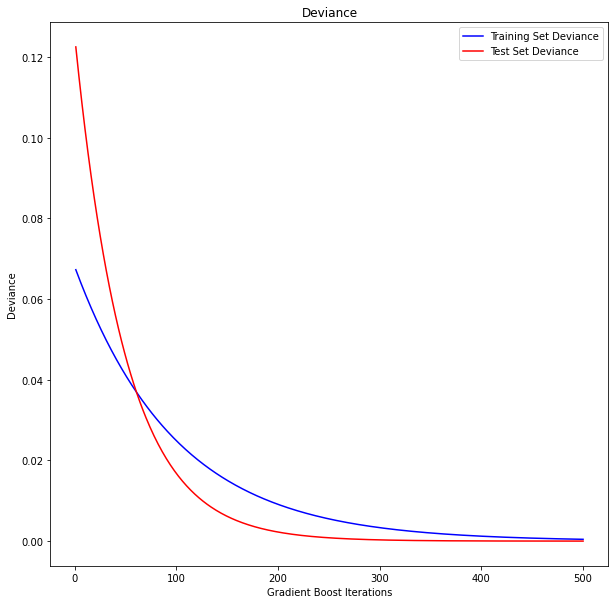

In [ ]:
import matplotlib.pyplot as plt

test_score = np.zeros((parameters["n_estimators"],), dtype=np.float64)
for elem, y_pred in enumerate(regression.staged_predict(X_test)):
  test_score[elem] = mean_squared_error(Y_test, y_pred)

fig = plt.figure(figsize = (10, 10))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(np.arange(parameters["n_estimators"]) + 1,
         regression.train_score_,
         "b-",
         label = "Training Set Deviance",
)

plt.plot(np.arange(parameters["n_estimators"]) + 1, test_score, "r-", 
         label="Test Set Deviance")

plt.legend(loc = "upper right")
plt.xlabel("Gradient Boost Iterations")
plt.ylabel("Deviance")
plt.show()


# Feature Importance(Permutation) -WIP

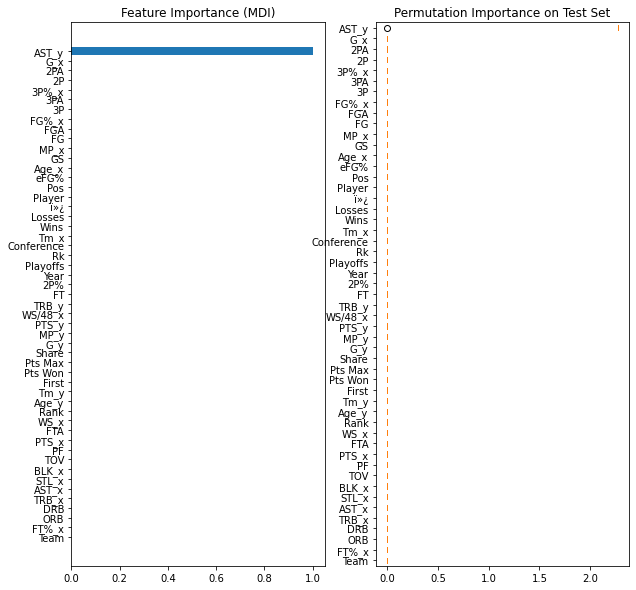

In [ ]:
# *****Future Work******

from sklearn.inspection import permutation_importance

important_features = regression.feature_importances_
sorted_idx = np.argsort(important_features)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.barh(pos, important_features[sorted_idx], align="center")
plt.yticks(pos, np.array(merged_dpoy.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(regression, X_test, Y_test, n_repeats = 10, 
                                random_state = 42, n_jobs = 3)

sorted_idx = result.importances_mean.argsort()
plt.subplot(1,2,2)
plt.boxplot(result.importances[sorted_idx].T,
            vert = False,
            labels = np.array(merged_dpoy.columns)[sorted_idx],
            )
plt.title("Permutation Importance on Test Set")
plt.show()

#AST_y is the only thing getting a graph???